In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!rm -rf /kaggle/working/m2s
# Git clone your repository
!git clone https://github.com/namirahrasul/M2S.git /kaggle/working/m2s

Cloning into '/kaggle/working/m2s'...
remote: Enumerating objects: 3786, done.
remote: Counting objects: 100% (3786/3786), done.
remote: Compressing objects: 100% (2761/2761), done.
remote: Total 3786 (delta 24), reused 3774 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (3786/3786), 33.08 MiB | 39.34 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
!rm -rf /kaggle/working/miniconda
!wget -q https://repo.anaconda.com/miniconda/Miniconda3-py39_23.5.2-0-Linux-x86_64.sh -O miniconda.sh
!chmod +x miniconda.sh
!bash ./miniconda.sh -b -f -p /kaggle/working/miniconda
!rm miniconda.sh

# Verify Miniconda installation (check for python binary)
!ls -l /kaggle/working/miniconda/bin/python || echo "Python binary missing!"

# Ensure Conda binaries are executable
!chmod +x /kaggle/working/miniconda/bin/conda
!chmod +x /kaggle/working/miniconda/bin/python  # Explicitly make python executable
!chmod +x /kaggle/working/miniconda/etc/profile.d/conda.sh

PREFIX=/kaggle/working/miniconda
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /kaggle/working/miniconda
lrwxrwxrwx 1 root root 9 Aug  2 15:12 /kaggle/working/miniconda/bin/python -> python3.9


In [4]:
os.environ['PATH'] = "/kaggle/working/miniconda/bin:" + os.environ['PATH']

In [5]:
%%capture
!conda install conda=25.1.1 -y

In [6]:
# Activate the environment
!source /kaggle/working/miniconda/etc/profile.d/conda.sh && conda activate m2s


EnvironmentNameNotFound: Could not find conda environment: m2s
You can list all discoverable environments with `conda info --envs`.




In [7]:
%%capture
# Initialize Conda
!conda init bash

# Create Conda environment with Python 3.9
!conda create -n m2s python=3.9 -y

In [8]:
%%capture
!conda install -n m2s mpi4py openmpi -y
!conda install -n m2s git -y
!pip install gdown

In [9]:
%%capture
!source /kaggle/working/miniconda/etc/profile.d/conda.sh && conda activate m2s && \
cd /kaggle/working/m2s && python setup.py

In [10]:
!mkdir -p /kaggle/working/m2s/logs
!mkdir -p /kaggle/working/m2s/checkpoints

In [11]:
# Download checkpoints from Google Drive (replace with your file IDs)
import gdown
#imagenet(1M epoch)
file_id_64 = '1OsL6UrYFUtmwBLcOdRViRcfTSdoIySjR'  
file_id_256 = '1fX0mcIWPAz7fd7tIWcVxFuPf65bqCjj3' 
gdown.download(f'https://drive.google.com/uc?id={file_id_64}', '/kaggle/working/m2s/checkpoints/imagenet64_1000000.pt', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={file_id_256}', '/kaggle/working/m2s/checkpoints/imagenet256_1000000.pt', quiet=False)
#celeba-hq(1M epoch)
file_id_64 = '1GWdEYCqcGd55Gqkli80Z_O_t9cKuJWWP'  
file_id_256 = '16Hz_Fis2PPmq2RrFy9Kj9WkZoXdsc3K0' 
gdown.download(f'https://drive.google.com/uc?id={file_id_64}', '/kaggle/working/m2s/checkpoints/celebahq64_1000000.pt', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={file_id_256}', '/kaggle/working/m2s/checkpoints/celebahq256_1000000.pt', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1OsL6UrYFUtmwBLcOdRViRcfTSdoIySjR
From (redirected): https://drive.google.com/uc?id=1OsL6UrYFUtmwBLcOdRViRcfTSdoIySjR&confirm=t&uuid=4f4e59d2-3329-46c0-bee6-863ed32b1fdd
To: /kaggle/working/m2s/checkpoints/imagenet64_1000000.pt
100%|██████████| 273M/273M [00:03<00:00, 72.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1fX0mcIWPAz7fd7tIWcVxFuPf65bqCjj3
From (redirected): https://drive.google.com/uc?id=1fX0mcIWPAz7fd7tIWcVxFuPf65bqCjj3&confirm=t&uuid=78bdd9d1-43ac-4f98-9cf3-e8890041bada
To: /kaggle/working/m2s/checkpoints/imagenet256_1000000.pt
100%|██████████| 374M/374M [00:03<00:00, 102MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1GWdEYCqcGd55Gqkli80Z_O_t9cKuJWWP
From (redirected): https://drive.google.com/uc?id=1GWdEYCqcGd55Gqkli80Z_O_t9cKuJWWP&confirm=t&uuid=607509f6-7351-4091-96c0-85bb837513dc
To: /kaggle/working/m2s/checkpoints/celebahq64_1000000.pt
100%|██████████| 273M/27

'/kaggle/working/m2s/checkpoints/celebahq256_1000000.pt'

In [12]:
gd_str = '"""\n'\
'This code started out as a PyTorch port of Ho et al\'s diffusion models:\n'\
'https://github.com/hojonathanho/diffusion/blob/1e0dceb3b3495bbe19116a5e1b3596cd0706c543/diffusion_tf/diffusion_utils_2.py\n'\
'\n'\
'Docstrings have been added, as well as DDIM sampling and a new collection of beta schedules.\n'\
'"""\n'\
'\n'\
'import enum\n'\
'import math\n'\
'\n'\
'import numpy as np\n'\
'import torch as th\n'\
'import torch.nn.functional as F\n'\
'from PIL import Image\n'\
'import os\n'\
'from collections import defaultdict\n'\
'\n'\
'from .nn import mean_flat\n'\
'from .losses import normal_kl, discretized_gaussian_log_likelihood\n'\
'\n'\
'\n'\
'def get_named_beta_schedule(schedule_name, num_diffusion_timesteps):\n'\
'    """\n'\
'    Get a pre-defined beta schedule for the given name.\n'\
'\n'\
'    The beta schedule library consists of beta schedules which remain similar\n'\
'    in the limit of num_diffusion_timesteps.\n'\
'    Beta schedules may be added, but should not be removed or changed once\n'\
'    they are committed to maintain backwards compatibility.\n'\
'    """\n'\
'    if schedule_name == "linear":\n'\
'        # Linear schedule from Ho et al, extended to work for any number of\n'\
'        # diffusion steps.\n'\
'        scale = 1000 / num_diffusion_timesteps\n'\
'        beta_start = scale * 0.0001\n'\
'        beta_end = scale * 0.02\n'\
'        return np.linspace(\n'\
'            beta_start, beta_end, num_diffusion_timesteps, dtype=np.float64\n'\
'        )\n'\
'    elif schedule_name == "cosine":\n'\
'        return betas_for_alpha_bar(\n'\
'            num_diffusion_timesteps,\n'\
'            lambda t: math.cos((t + 0.008) / 1.008 * math.pi / 2) ** 2,\n'\
'        )\n'\
'    else:\n'\
'        raise NotImplementedError(f"unknown beta schedule: {schedule_name}")\n'\
'\n'\
'\n'\
'def betas_for_alpha_bar(num_diffusion_timesteps, alpha_bar, max_beta=0.999):\n'\
'    """\n'\
'    Create a beta schedule that discretizes the given alpha_t_bar function,\n'\
'    which defines the cumulative product of (1-beta) over time from t = [0,1].\n'\
'\n'\
'    :param num_diffusion_timesteps: the number of betas to produce.\n'\
'    :param alpha_bar: a lambda that takes an argument t from 0 to 1 and\n'\
'                      produces the cumulative product of (1-beta) up to that\n'\
'                      part of the diffusion process.\n'\
'    :param max_beta: the maximum beta to use; use values lower than 1 to\n'\
'                     prevent singularities.\n'\
'    """\n'\
'    betas = []\n'\
'    for i in range(num_diffusion_timesteps):\n'\
'        t1 = i / num_diffusion_timesteps\n'\
'        t2 = (i + 1) / num_diffusion_timesteps\n'\
'        betas.append(min(1 - alpha_bar(t2) / alpha_bar(t1), max_beta))\n'\
'    return np.array(betas)\n'\
'\n'\
'\n'\
'class ModelMeanType(enum.Enum):\n'\
'    """\n'\
'    Which type of output the model predicts.\n'\
'    """\n'\
'\n'\
'    PREVIOUS_X = enum.auto()  # the model predicts x_{t-1}\n'\
'    START_X = enum.auto()  # the model predicts x_0\n'\
'    EPSILON = enum.auto()  # the model predicts epsilon\n'\
'\n'\
'\n'\
'class ModelVarType(enum.Enum):\n'\
'    """\n'\
'    What is used as the model\'s output variance.\n'\
'\n'\
'    The LEARNED_RANGE option has been added to allow the model to predict\n'\
'    values between FIXED_SMALL and FIXED_LARGE, making its job easier.\n'\
'    """\n'\
'\n'\
'    LEARNED = enum.auto()\n'\
'    FIXED_SMALL = enum.auto()\n'\
'    FIXED_LARGE = enum.auto()\n'\
'    LEARNED_RANGE = enum.auto()\n'\
'\n'\
'\n'\
'class LossType(enum.Enum):\n'\
'    MSE = enum.auto()  # use raw MSE loss (and KL when learning variances)\n'\
'    RESCALED_MSE = (\n'\
'        enum.auto()\n'\
'    )  # use raw MSE loss (with RESCALED_KL when learning variances)\n'\
'    KL = enum.auto()  # use the variational lower-bound\n'\
'    RESCALED_KL = enum.auto()  # like KL, but rescale to estimate the full VLB\n'\
'\n'\
'    def is_vb(self):\n'\
'        return self == LossType.KL or self == LossType.RESCALED_KL\n'\
'\n'\
'\n'\
'class GaussianDiffusion:\n'\
'    """\n'\
'    Utilities for training and sampling diffusion models.\n'\
'\n'\
'    Ported directly from here, and then adapted over time to further experimentation.\n'\
'    https://github.com/hojonathanho/diffusion/blob/1e0dceb3b3495bbe19116a5e1b3596cd0706c543/diffusion_tf/diffusion_utils_2.py#L42\n'\
'\n'\
'    :param betas: a 1-D numpy array of betas for each diffusion timestep,\n'\
'                  starting at T and going to 1.\n'\
'    :param model_mean_type: a ModelMeanType determining what the model outputs.\n'\
'    :param model_var_type: a ModelVarType determining how variance is output.\n'\
'    :param loss_type: a LossType determining the loss function to use.\n'\
'    :param rescale_timesteps: if True, pass floating point timesteps into the\n'\
'                              model so that they are always scaled like in the\n'\
'                              original paper (0 to 1000).\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        *,\n'\
'        betas,\n'\
'        model_mean_type,\n'\
'        model_var_type,\n'\
'        loss_type,\n'\
'        rescale_timesteps=False,\n'\
'        betas1000=None,\n'\
'    ):\n'\
'        self.model_mean_type = model_mean_type\n'\
'        self.model_var_type = model_var_type\n'\
'        self.loss_type = loss_type\n'\
'        self.rescale_timesteps = rescale_timesteps\n'\
'        \n'\
'\n'\
'        # Use float64 for accuracy.\n'\
'        betas = np.array(betas, dtype=np.float64)\n'\
'        self.betas = betas\n'\
'        assert len(betas.shape) == 1, "betas must be 1-D"\n'\
'        assert (betas > 0).all() and (betas <= 1).all()\n'\
'\n'\
'        self.num_timesteps = int(betas.shape[0])\n'\
'\n'\
'        alphas = 1.0 - betas\n'\
'        self.alphas_cumprod = np.cumprod(alphas, axis=0)\n'\
'        self.alphas_cumprod_prev = np.append(1.0, self.alphas_cumprod[:-1])\n'\
'        self.alphas_cumprod_next = np.append(self.alphas_cumprod[1:], 0.0)\n'\
'        assert self.alphas_cumprod_prev.shape == (self.num_timesteps,)\n'\
'\n'\
'        # calculations for diffusion q(x_t | x_{t-1}) and others\n'\
'        self.sqrt_alphas_cumprod = np.sqrt(self.alphas_cumprod)\n'\
'        self.sqrt_one_minus_alphas_cumprod = np.sqrt(1.0 - self.alphas_cumprod)\n'\
'        self.log_one_minus_alphas_cumprod = np.log(1.0 - self.alphas_cumprod)\n'\
'        self.sqrt_recip_alphas_cumprod = np.sqrt(1.0 / self.alphas_cumprod)\n'\
'        self.sqrt_recipm1_alphas_cumprod = np.sqrt(1.0 / self.alphas_cumprod - 1)\n'\
'\n'\
'        if betas1000 is not None:\n'\
'            betas1000 = np.array(betas1000, dtype=np.float64)\n'\
'            alphas1000 = 1.0 - betas1000\n'\
'            self.alphas_cumprod1000 = np.cumprod(alphas1000, axis=0)\n'\
'            self.sqrt_alphas_cumprod1000 = np.sqrt(self.alphas_cumprod1000)\n'\
'            self.sqrt_one_minus_alphas_cumprod1000 = np.sqrt(1.0 - self.alphas_cumprod1000)\n'\
'\n'\
'        # calculations for posterior q(x_{t-1} | x_t, x_0)\n'\
'        self.posterior_variance = (\n'\
'            betas * (1.0 - self.alphas_cumprod_prev) / (1.0 - self.alphas_cumprod)\n'\
'        )\n'\
'        # log calculation clipped because the posterior variance is 0 at the\n'\
'        # beginning of the diffusion chain.\n'\
'        self.posterior_log_variance_clipped = np.log(\n'\
'            np.append(self.posterior_variance[1], self.posterior_variance[1:])\n'\
'        )\n'\
'        self.posterior_mean_coef1 = (\n'\
'            betas * np.sqrt(self.alphas_cumprod_prev) / (1.0 - self.alphas_cumprod)\n'\
'        )\n'\
'        self.posterior_mean_coef2 = (\n'\
'            (1.0 - self.alphas_cumprod_prev)\n'\
'            * np.sqrt(alphas)\n'\
'            / (1.0 - self.alphas_cumprod)\n'\
'        )\n'\
'\n'\
'    def q_mean_variance(self, x_start, t):\n'\
'        """\n'\
'        Get the distribution q(x_t | x_0).\n'\
'\n'\
'        :param x_start: the [N x C x ...] tensor of noiseless inputs.\n'\
'        :param t: the number of diffusion steps (minus 1). Here, 0 means one step.\n'\
'        :return: A tuple (mean, variance, log_variance), all of x_start\'s shape.\n'\
'        """\n'\
'        mean = (\n'\
'            _extract_into_tensor(self.sqrt_alphas_cumprod, t, x_start.shape) * x_start\n'\
'        )\n'\
'        variance = _extract_into_tensor(1.0 - self.alphas_cumprod, t, x_start.shape)\n'\
'        log_variance = _extract_into_tensor(\n'\
'            self.log_one_minus_alphas_cumprod, t, x_start.shape\n'\
'        )\n'\
'        return mean, variance, log_variance\n'\
'\n'\
'    def add_onestep_noise(self, x_t, t):\n'\
'        device = x_t.device\n'\
'        noise = th.randn_like(x_t).to(device)\n'\
'        betas_tensor = th.from_numpy(self.betas).to(device)\n'\
'        x_out = th.sqrt(1. - betas_tensor[t[0]]) * x_t + th.sqrt(betas_tensor[t[0]]) * noise\n'\
'        return x_out.to(device)\n'\
'\n'\
'    def q_sample(self, x_start, t, noise=None, tscale1000=False):\n'\
'        """\n'\
'        Diffuse the data for a given number of diffusion steps.\n'\
'\n'\
'        In other words, sample from q(x_t | x_0).\n'\
'\n'\
'        :param x_start: the initial data batch.\n'\
'        :param t: the number of diffusion steps (minus 1). Here, 0 means one step.\n'\
'        :param noise: if specified, the split-out normal noise.\n'\
'        :return: A noisy version of x_start.\n'\
'        """\n'\
'        if noise is None:\n'\
'            noise = th.randn_like(x_start)\n'\
'        assert noise.shape == x_start.shape\n'\
'        if tscale1000:\n'\
'            return (\n'\
'                _extract_into_tensor(self.sqrt_alphas_cumprod1000, t, x_start.shape) * x_start\n'\
'                + _extract_into_tensor(self.sqrt_one_minus_alphas_cumprod1000, t, x_start.shape)\n'\
'                * noise\n'\
'            )\n'\
'        return (\n'\
'            _extract_into_tensor(self.sqrt_alphas_cumprod, t, x_start.shape) * x_start\n'\
'            + _extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x_start.shape)\n'\
'            * noise\n'\
'        )\n'\
'\n'\
'    def undo(self, image_before_step, img_after_model, est_x_0, t, debug=False):\n'\
'        return self._undo(img_after_model, t)\n'\
'\n'\
'    def _undo(self, img_out, t):\n'\
'        beta = _extract_into_tensor(self.betas, t, img_out.shape)\n'\
'\n'\
'        img_in_est = th.sqrt(1 - beta) * img_out + \\\n'\
'            th.sqrt(beta) * th.randn_like(img_out)\n'\
'\n'\
'        return img_in_est\n'\
'\n'\
'    def q_posterior_mean_variance(self, x_start, x_t, t):\n'\
'        """\n'\
'        Compute the mean and variance of the diffusion posterior:\n'\
'\n'\
'            q(x_{t-1} | x_t, x_0)\n'\
'\n'\
'        """\n'\
'        assert x_start.shape == x_t.shape\n'\
'        posterior_mean = (\n'\
'            _extract_into_tensor(self.posterior_mean_coef1, t, x_t.shape) * x_start\n'\
'            + _extract_into_tensor(self.posterior_mean_coef2, t, x_t.shape) * x_t\n'\
'        )\n'\
'        posterior_variance = _extract_into_tensor(self.posterior_variance, t, x_t.shape)\n'\
'        posterior_log_variance_clipped = _extract_into_tensor(\n'\
'            self.posterior_log_variance_clipped, t, x_t.shape\n'\
'        )\n'\
'        assert (\n'\
'            posterior_mean.shape[0]\n'\
'            == posterior_variance.shape[0]\n'\
'            == posterior_log_variance_clipped.shape[0]\n'\
'            == x_start.shape[0]\n'\
'        )\n'\
'        return posterior_mean, posterior_variance, posterior_log_variance_clipped\n'\
'\n'\
'    def p_mean_variance(\n'\
'        self, model, x, t, clip_denoised=True, denoised_fn=None, model_kwargs=None\n'\
'    ):\n'\
'        """\n'\
'        Apply the model to get p(x_{t-1} | x_t), as well as a prediction of\n'\
'        the initial x, x_0.\n'\
'\n'\
'        :param model: the model, which takes a signal and a batch of timesteps\n'\
'                      as input.\n'\
'        :param x: the [N x C x ...] tensor at time t.\n'\
'        :param t: a 1-D Tensor of timesteps.\n'\
'        :param clip_denoised: if True, clip the denoised signal into [-1, 1].\n'\
'        :param denoised_fn: if not None, a function which applies to the\n'\
'            x_start prediction before it is used to sample. Applies before\n'\
'            clip_denoised.\n'\
'        :param model_kwargs: if not None, a dict of extra keyword arguments to\n'\
'            pass to the model. This can be used for conditioning.\n'\
'        :return: a dict with the following keys:\n'\
'                 - \'mean\': the model mean output.\n'\
'                 - \'variance\': the model variance output.\n'\
'                 - \'log_variance\': the log of \'variance\'.\n'\
'                 - \'pred_xstart\': the prediction for x_0.\n'\
'        """\n'\
'        if model_kwargs is None:\n'\
'            model_kwargs = {}\n'\
'\n'\
'        B, C = x.shape[:2]\n'\
'        assert t.shape == (B,)\n'\
'        model_output = model(x, self._scale_timesteps(t), **model_kwargs)\n'\
'        # print(model_output.shape)\n'\
'        # exit(0)\n'\
'\n'\
'        assert model_output.shape == (B, C * 2, *x.shape[2:])\n'\
'        model_output, model_var_values = th.split(model_output, C, dim=1)\n'\
'\n'\
'        if self.model_var_type == ModelVarType.LEARNED:\n'\
'            model_log_variance = model_var_values\n'\
'            model_variance = th.exp(model_log_variance)\n'\
'        else:\n'\
'            min_log = _extract_into_tensor(\n'\
'                self.posterior_log_variance_clipped, t, x.shape\n'\
'            )\n'\
'            max_log = _extract_into_tensor(np.log(self.betas), t, x.shape)\n'\
'            frac = (model_var_values + 1) / 2\n'\
'            model_log_variance = frac * max_log + (1 - frac) * min_log\n'\
'            model_variance = th.exp(model_log_variance)\n'\
'\n'\
'        def process_xstart(x):\n'\
'            if denoised_fn is not None:\n'\
'                x = denoised_fn(x)\n'\
'            if clip_denoised:\n'\
'                return x.clamp(-1, 1)\n'\
'            return x\n'\
'\n'\
'        if self.model_mean_type == ModelMeanType.PREVIOUS_X:\n'\
'            pred_xstart = process_xstart(\n'\
'                self._predict_xstart_from_xprev(x_t=x, t=t, xprev=model_output)\n'\
'            )\n'\
'            model_mean = model_output\n'\
'        elif self.model_mean_type in [ModelMeanType.START_X, ModelMeanType.EPSILON]:\n'\
'            if self.model_mean_type == ModelMeanType.START_X:\n'\
'                pred_xstart = process_xstart(model_output)\n'\
'            else:\n'\
'                pred_xstart = process_xstart(\n'\
'                    self._predict_xstart_from_eps(x_t=x, t=t, eps=model_output)\n'\
'                )\n'\
'            model_mean, _, _ = self.q_posterior_mean_variance(\n'\
'                x_start=pred_xstart, x_t=x, t=t\n'\
'            )\n'\
'        else:\n'\
'            raise NotImplementedError(self.model_mean_type)\n'\
'\n'\
'        assert (\n'\
'            model_mean.shape == model_log_variance.shape == pred_xstart.shape == x.shape\n'\
'        )\n'\
'        return {\n'\
'            "mean": model_mean,\n'\
'            "variance": model_variance,\n'\
'            "log_variance": model_log_variance,\n'\
'            "pred_xstart": pred_xstart,\n'\
'        }\n'\
'\n'\
'    def _predict_xstart_from_eps(self, x_t, t, eps):\n'\
'        assert x_t.shape == eps.shape\n'\
'        return (\n'\
'            _extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x_t.shape) * x_t\n'\
'            - _extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x_t.shape) * eps\n'\
'        )\n'\
'\n'\
'    def _predict_xstart_from_xprev(self, x_t, t, xprev):\n'\
'        assert x_t.shape == xprev.shape\n'\
'        return (  # (xprev - coef2*x_t) / coef1\n'\
'            _extract_into_tensor(1.0 / self.posterior_mean_coef1, t, x_t.shape) * xprev\n'\
'            - _extract_into_tensor(\n'\
'                self.posterior_mean_coef2 / self.posterior_mean_coef1, t, x_t.shape\n'\
'            )\n'\
'            * x_t\n'\
'        )\n'\
'\n'\
'    def _predict_eps_from_xstart(self, x_t, t, pred_xstart):\n'\
'        return (\n'\
'            _extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x_t.shape) * x_t\n'\
'            - pred_xstart\n'\
'        ) / _extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x_t.shape)\n'\
'\n'\
'    # def _scale_timesteps(self, t):\n'\
'    #     if self.rescale_timesteps:\n'\
'    #         return t.float() * (1000.0 / self.num_timesteps)\n'\
'    #     return t\n'\
'\n'\
'    def condition_mean(self, cond_fn, p_mean_var, x, t, model_kwargs=None):\n'\
'        """\n'\
'        Compute the mean for the previous step, given a function cond_fn that\n'\
'        computes the gradient of a conditional log probability with respect to\n'\
'        x. In particular, cond_fn computes grad(log(p(y|x))), and we want to\n'\
'        condition on y.\n'\
'\n'\
'        This uses the conditioning strategy from Sohl-Dickstein et al. (2015).\n'\
'        """\n'\
'        gradient = cond_fn(x, self._scale_timesteps(t), **model_kwargs)\n'\
'        new_mean = (\n'\
'            p_mean_var["mean"].float() + p_mean_var["variance"] * gradient.float()\n'\
'        )\n'\
'        return new_mean\n'\
'\n'\
'    def condition_score(self, cond_fn, p_mean_var, x, t, model_kwargs=None):\n'\
'        """\n'\
'        Compute what the p_mean_variance output would have been, should the\n'\
'        model\'s score function be conditioned by cond_fn.\n'\
'\n'\
'        See condition_mean() for details on cond_fn.\n'\
'\n'\
'        Unlike condition_mean(), this instead uses the conditioning strategy\n'\
'        from Song et al (2020).\n'\
'        """\n'\
'        alpha_bar = _extract_into_tensor(self.alphas_cumprod, t, x.shape)\n'\
'\n'\
'        eps = self._predict_eps_from_xstart(x, t, p_mean_var["pred_xstart"])\n'\
'        eps = eps - (1 - alpha_bar).sqrt() * cond_fn(\n'\
'            x, self._scale_timesteps(t), **model_kwargs\n'\
'        )\n'\
'\n'\
'        out = p_mean_var.copy()\n'\
'        out["pred_xstart"] = self._predict_xstart_from_eps(x, t, eps)\n'\
'        out["mean"], _, _ = self.q_posterior_mean_variance(\n'\
'            x_start=out["pred_xstart"], x_t=x, t=t\n'\
'        )\n'\
'        return out\n'\
'\n'\
'    def p_sample(\n'\
'        self,\n'\
'        model,\n'\
'        x,\n'\
'        t,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        model_mask_kwargs=None,\n'\
'        meas_fn=None,\n'\
'        pred_xstart=None,\n'\
'        idx_wall=-1,\n'\
'        resizers=None,\n'\
'\n'\
'        inpa_inj_sched_prev=True,\n'\
'        inpa_inj_sched_prev_cumnoise=False\n'\
'    ):\n'\
'        """\n'\
'        Sample x_{t-1} from the model at the given timestep.\n'\
'\n'\
'        :param model: the model to sample from.\n'\
'        :param x: the current tensor at x_{t-1}.\n'\
'        :param t: the value of t, starting at 0 for the first diffusion step.\n'\
'        :param clip_denoised: if True, clip the x_start prediction to [-1, 1].\n'\
'        :param denoised_fn: if not None, a function which applies to the\n'\
'            x_start prediction before it is used to sample.\n'\
'        :param cond_fn: if not None, this is a gradient function that acts\n'\
'                        similarly to the model.\n'\
'        :param model_kwargs: if not None, a dict of extra keyword arguments to\n'\
'            pass to the model. This can be used for conditioning.\n'\
'        :return: a dict containing the following keys:\n'\
'                 - \'sample\': a random sample from the model.\n'\
'                 - \'pred_xstart\': a prediction of x_0.\n'\
'        """\n'\
'        noise = th.randn_like(x)\n'\
'\n'\
'        if inpa_inj_sched_prev:\n'\
'\n'\
'            if pred_xstart is not None:\n'\
'                gt_keep_mask = th.zeros(x.shape).to(x.device)\n'\
'                gt_keep_mask[model_mask_kwargs["ref_img"] > 0.] = 1\n'\
'                gt_keep_mask[model_mask_kwargs["ref_img"] < 0.] = 0\n'\
'                # if gt_keep_mask is None:\n'\
'                #     gt_keep_mask = conf.get_inpa_mask(x)\n'\
'\n'\
'                gt = model_kwargs[\'ref_img\']\n'\
'\n'\
'                alpha_cumprod = _extract_into_tensor(\n'\
'                    self.alphas_cumprod, t, x.shape)\n'\
'\n'\
'                if inpa_inj_sched_prev_cumnoise:\n'\
'                    weighed_gt = self.get_gt_noised(gt, int(t[0].item()))\n'\
'                else:\n'\
'                    gt_weight = th.sqrt(alpha_cumprod)\n'\
'                    gt_part = gt_weight * gt\n'\
'\n'\
'                    noise_weight = th.sqrt((1 - alpha_cumprod))\n'\
'                    noise_part = noise_weight * th.randn_like(x)\n'\
'\n'\
'                    weighed_gt = gt_part + noise_part\n'\
'\n'\
'                x = (\n'\
'                    gt_keep_mask * (\n'\
'                        weighed_gt\n'\
'                    )\n'\
'                    +\n'\
'                    (1 - gt_keep_mask) * (\n'\
'                        x\n'\
'                    )\n'\
'                )\n'\
'\n'\
'        out = self.p_mean_variance(\n'\
'            model,\n'\
'            x,\n'\
'            t,\n'\
'            clip_denoised=clip_denoised,\n'\
'            denoised_fn=denoised_fn,\n'\
'            model_kwargs=model_kwargs,\n'\
'        )\n'\
'\n'\
'        nonzero_mask = (\n'\
'            (t != 0).float().view(-1, *([1] * (len(x.shape) - 1)))\n'\
'        ) \n'\
'\n'\
'        if cond_fn is not None:\n'\
'            out["mean"] = self.condition_mean(\n'\
'                cond_fn, out, x, t, model_kwargs=model_kwargs\n'\
'            )\n'\
'\n'\
'        sample = out["mean"] + nonzero_mask * \\\n'\
'            th.exp(0.5 * out["log_variance"]) * noise\n'\
'\n'\
'        result = {"sample": sample,\n'\
'                  "pred_xstart": out["pred_xstart"]}\n'\
'\n'\
'        return result\n'\
'\n'\
'    def p_sample_loop(\n'\
'        self,\n'\
'        model,\n'\
'        shape,\n'\
'        noise=None,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        model_mask_kwargs=None,\n'\
'        device=None,\n'\
'        progress=False,\n'\
'        resizers=None,\n'\
'        lamda=1,\n'\
'        resample_num=None,\n'\
'        range_t=0,\n'\
'\n'\
'        t_T=None,\n'\
'        n_sample=None,\n'\
'        jump_length=None,\n'\
'        jump_n_sample=None,\n'\
'        jump_interval=None,\n'\
'        ilvr_step=5,\n'\
'\n'\
'        inpa_inj_sched_prev=True,\n'\
'        inpa_inj_sched_prev_cumnoise=False,\n'\
'        use_ddim=False,\n'\
'        ddim_stride=5,\n'\
'    ):\n'\
'        """\n'\
'        Generate samples from the model.\n'\
'\n'\
'        :param model: the model module.\n'\
'        :param shape: the shape of the samples, (N, C, H, W).\n'\
'        :param noise: if specified, the noise from the encoder to sample.\n'\
'                      Should be of the same shape as `shape`.\n'\
'        :param clip_denoised: if True, clip x_start predictions to [-1, 1].\n'\
'        :param denoised_fn: if not None, a function which applies to the\n'\
'            x_start prediction before it is used to sample.\n'\
'        :param cond_fn: if not None, this is a gradient function that acts\n'\
'                        similarly to the model.\n'\
'        :param model_kwargs: if not None, a dict of extra keyword arguments to\n'\
'            pass to the model. This can be used for conditioning.\n'\
'        :param device: if specified, the device to create the samples on.\n'\
'                       If not specified, use a model parameter\'s device.\n'\
'        :param progress: if True, show a tqdm progress bar.\n'\
'        :return: a non-differentiable batch of samples.\n'\
'        """\n'\
'        final = None\n'\
'        for sample in self.p_sample_loop_progressive(\n'\
'            model,\n'\
'            shape,\n'\
'            noise=noise,\n'\
'            clip_denoised=clip_denoised,\n'\
'            denoised_fn=denoised_fn,\n'\
'            cond_fn=cond_fn,\n'\
'            model_kwargs=model_kwargs,\n'\
'            model_mask_kwargs=model_mask_kwargs,\n'\
'            device=device,\n'\
'            progress=progress,\n'\
'            resizers=resizers,\n'\
'            range_t=range_t,\n'\
'            resample_num=resample_num,\n'\
'            lamda=lamda,\n'\
'\n'\
'            t_T=t_T,\n'\
'            n_sample=n_sample,\n'\
'            jump_length=jump_length,\n'\
'            jump_n_sample = jump_n_sample,\n'\
'            jump_interval=jump_interval,\n'\
'            ilvr_step = ilvr_step,\n'\
'\n'\
'            inpa_inj_sched_prev=inpa_inj_sched_prev,\n'\
'            inpa_inj_sched_prev_cumnoise=inpa_inj_sched_prev_cumnoise,\n'\
'            use_ddim=use_ddim,\n'\
'            ddim_stride=ddim_stride,\n'\
'        ):\n'\
'            final = sample\n'\
'\n'\
'        return final["sample"]\n'\
'\n'\
'    def p_sample_loop_progressive(\n'\
'        self,\n'\
'        model,\n'\
'        shape,\n'\
'        noise=None,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        model_mask_kwargs=None,\n'\
'        resizers=None,\n'\
'        range_t=None,\n'\
'        resample_num=None,\n'\
'        lamda=None,\n'\
'        device=None,\n'\
'        progress=False,\n'\
'\n'\
'        schedule_jump_params=True,\n'\
'        t_T=250,\n'\
'        n_sample=1,\n'\
'        jump_length=1,\n'\
'        jump_n_sample=1,\n'\
'        jump_interval=9999,\n'\
'        ilvr_step=5,\n'\
'\n'\
'        inpa_inj_sched_prev=True,\n'\
'        inpa_inj_sched_prev_cumnoise=False,\n'\
'        use_ddim=False,\n'\
'        ddim_stride=5,\n'\
'    ):\n'\
'        """\n'\
'        Generate samples from the model and yield intermediate samples from\n'\
'        each timestep of diffusion.\n'\
'\n'\
'        Arguments are the same as p_sample_loop().\n'\
'        Returns a generator over dicts, where each dict is the return value of\n'\
'        p_sample().\n'\
'        """\n'\
'        if device is None:\n'\
'            device = next(model.parameters()).device\n'\
'        assert isinstance(shape, (tuple, list))\n'\
'        if noise is not None:\n'\
'            image_after_step = noise\n'\
'        else:\n'\
'            image_after_step = th.randn(*shape, device=device)\n'\
'\n'\
'        # debug_steps = conf.pget(\'debug.num_timesteps\')\n'\
'\n'\
'        self.gt_noises = None  # reset for next image\n'\
'\n'\
'\n'\
'        pred_xstart = None\n'\
'        ilvr_num = 0\n'\
'\n'\
'        idx_wall = -1\n'\
'        sample_idxs = defaultdict(lambda: 0)\n'\
'\n'\
'        if schedule_jump_params:\n'\
'            times = get_schedule_jump(t_T=t_T, n_sample=n_sample,\n'\
'                                      jump_length=jump_length, jump_n_sample=jump_n_sample, jump_interval=jump_interval)\n'\
'            if use_ddim:\n'\
'                times_jump = []\n'\
'                for i in range(len(times)):\n'\
'                    if i == 0 or i == len(times)-1:\n'\
'                        times_jump.append(times[i])\n'\
'                        continue\n'\
'                    if times[i] > times[i-1] and times[i] > times[i+1]:\n'\
'                        times_jump.append(times[i])\n'\
'                    elif times[i] < times[i-1] and times[i] < times[i+1]:\n'\
'                        times_jump.append(times[i])\n'\
'\n'\
'                cur = 0\n'\
'                while (cur < len(times_jump)-1):\n'\
'                    length = times_jump[cur]-times_jump[cur+1]\n'\
'                    if length > ddim_stride or length < -ddim_stride:\n'\
'                        if length > 0:\n'\
'                            t_in = times_jump[cur] - ddim_stride\n'\
'                            border = times_jump[cur+1]\n'\
'                            while t_in > border:\n'\
'                                times_jump.insert(cur+1, t_in)\n'\
'                                cur += 1\n'\
'                                t_in -= ddim_stride\n'\
'                        else:\n'\
'                            t_in = times_jump[cur] + ddim_stride\n'\
'                            border = times_jump[cur+1]\n'\
'                            while t_in < border:\n'\
'                                times_jump.insert(cur+1, t_in)\n'\
'                                cur += 1\n'\
'                                t_in += ddim_stride\n'\
'                    cur += 1\n'\
'\n'\
'                time_pairs = list(zip(times_jump[:-1], times_jump[1:]))\n'\
'            else:\n'\
'                time_pairs = list(zip(times[:-1], times[1:]))\n'\
'\n'\
'            if progress:\n'\
'                from tqdm.auto import tqdm\n'\
'                time_pairs = tqdm(time_pairs)\n'\
'\n'\
'            for t_last, t_cur in time_pairs:\n'\
'                idx_wall += 1\n'\
'                t_last_t = th.tensor([t_last] * shape[0],  # pylint: disable=not-callable\n'\
'                                     device=device)\n'\
'                t_cur_t = th.tensor([t_cur] * shape[0],  # pylint: disable=not-callable\n'\
'                                     device=device)\n'\
'\n'\
'                if t_cur < t_last:  # reverse\n'\
'                    ilvr_num += 1\n'\
'                    with th.no_grad():\n'\
'                        model.order = idx_wall\n'\
'                        image_before_step = image_after_step.clone()\n'\
'                        if use_ddim:\n'\
'                            out = self.ddim_sample(\n'\
'                                model,\n'\
'                                image_after_step,\n'\
'                                t_last_t,\n'\
'                                t_cur_t,\n'\
'                                clip_denoised=clip_denoised,\n'\
'                                denoised_fn=denoised_fn,\n'\
'                                cond_fn=cond_fn,\n'\
'                                model_kwargs=model_kwargs,\n'\
'                                model_mask_kwargs=model_mask_kwargs,\n'\
'                                pred_xstart=pred_xstart\n'\
'                            )\n'\
'                        else:\n'\
'                            out = self.p_sample(\n'\
'                                model,\n'\
'                                image_after_step,\n'\
'                                t_last_t,\n'\
'                                clip_denoised=clip_denoised,\n'\
'                                denoised_fn=denoised_fn,\n'\
'                                cond_fn=cond_fn,\n'\
'                                resizers=resizers,\n'\
'                                model_kwargs=model_kwargs,\n'\
'                                model_mask_kwargs=model_mask_kwargs,\n'\
'                                pred_xstart=pred_xstart\n'\
'                            )\n'\
'\n'\
'                        image_after_step = out["sample"]\n'\
'                        pred_xstart = out["pred_xstart"]\n'\
'\n'\
'                        yield out\n'\
'\n'\
'                else:\n'\
'                    t_shift = 1\n'\
'\n'\
'                    image_before_step = image_after_step.clone()\n'\
'                    while t_last+t_shift <= t_cur:\n'\
'                        image_after_step = self.undo(\n'\
'                            image_before_step, image_after_step,\n'\
'                            est_x_0=out[\'pred_xstart\'], t=t_last_t+t_shift, debug=False)\n'\
'                        t_shift += 1\n'\
'                    pred_xstart = out["pred_xstart"]\n'\
'\n'\
'    def ddim_denoise(self, x, i, j, model):\n'\
'        n = x.shape[0]\n'\
'        xs = [x]\n'\
'        x0_preds = []\n'\
'\n'\
'        t = (th.ones(n) * i).to(x.device)\n'\
'        next_t = (th.ones(n) * j).to(x.device)\n'\
'        b = th.tensor(self.betas).to(x.device)\n'\
'        at = compute_alpha(b, t.long())\n'\
'        at_next = compute_alpha(b, next_t.long())\n'\
'        xt = xs[-1]\n'\
'        xt = xt.float()\n'\
'        model_output = model(xt, self._scale_timesteps(t))\n'\
'        model_output, model_var_values = th.split(model_output, 3, dim=1)\n'\
'        et = model_output\n'\
'        x0_t = (xt - et * (1 - at).sqrt()) / at.sqrt()\n'\
'        x0_preds.append(x0_t)\n'\
'        c1 = (0 * ((1 - at / at_next) * (1 - at_next) / (1 - at)).sqrt())\n'\
'        c2 = ((1 - at_next) - c1 ** 2).sqrt()\n'\
'        xt_next = at_next.sqrt() * x0_t + c1 * th.randn_like(x) + c2 * et\n'\
'        xs.append(xt_next)\n'\
'\n'\
'        return {\n'\
'            "sample": xs[len(xs)-1],\n'\
'            "pred_xstart": x0_preds[len(x0_preds)-1],\n'\
'        }\n'\
'\n'\
'\n'\
'    def ddim_sample(\n'\
'        self,\n'\
'        model,\n'\
'        x,\n'\
'        t,\n'\
'        s,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        model_mask_kwargs=None,\n'\
'        pred_xstart=None,\n'\
'        inpa_inj_sched_prev_cumnoise=False,\n'\
'        eta=0.0,\n'\
'    ):\n'\
'        """\n'\
'        Sample x_{t-1} from the model using DDIM.\n'\
'\n'\
'        Same usage as p_sample().\n'\
'        """\n'\
'        if pred_xstart is not None:\n'\
'            gt_keep_mask = th.zeros(x.shape).to(x.device)\n'\
'            gt_keep_mask[model_mask_kwargs["ref_img"] > 0.] = 1\n'\
'            gt_keep_mask[model_mask_kwargs["ref_img"] < 0.] = 0\n'\
'\n'\
'            gt = model_kwargs[\'ref_img\']\n'\
'\n'\
'            alpha_cumprod = _extract_into_tensor(\n'\
'                self.alphas_cumprod, t, x.shape)\n'\
'\n'\
'            if inpa_inj_sched_prev_cumnoise:\n'\
'                weighed_gt = self.get_gt_noised(gt, int(t[0].item()))\n'\
'            else:\n'\
'                gt_weight = th.sqrt(alpha_cumprod)\n'\
'                gt_part = gt_weight * gt\n'\
'\n'\
'                noise_weight = th.sqrt((1 - alpha_cumprod))\n'\
'                noise_part = noise_weight * th.randn_like(x)\n'\
'\n'\
'                weighed_gt = gt_part + noise_part\n'\
'\n'\
'            x = (\n'\
'                gt_keep_mask * (\n'\
'                    weighed_gt\n'\
'                )\n'\
'                +\n'\
'                (1 - gt_keep_mask) * (\n'\
'                    x\n'\
'                )\n'\
'            )\n'\
'        out = self.p_mean_variance(\n'\
'            model,\n'\
'            x,\n'\
'            t,\n'\
'            clip_denoised=clip_denoised,\n'\
'            denoised_fn=denoised_fn,\n'\
'            model_kwargs=model_kwargs,\n'\
'        )\n'\
'        if cond_fn is not None:\n'\
'            out = self.condition_score(cond_fn, out, x, t, model_kwargs=model_kwargs)\n'\
'\n'\
'        # Usually our model outputs epsilon, but we re-derive it\n'\
'        # in case we used x_start or x_prev prediction.\n'\
'        eps = self._predict_eps_from_xstart(x, t, out["pred_xstart"])\n'\
'\n'\
'        alpha_bar = _extract_into_tensor(self.alphas_cumprod, s+1, x.shape)\n'\
'        alpha_bar_prev = _extract_into_tensor(self.alphas_cumprod_prev, s+1, x.shape)\n'\
'        sigma = (\n'\
'            eta\n'\
'            * th.sqrt((1 - alpha_bar_prev) / (1 - alpha_bar))\n'\
'            * th.sqrt(1 - alpha_bar / alpha_bar_prev)\n'\
'        )\n'\
'        # Equation 12.\n'\
'        noise = th.randn_like(x)\n'\
'\n'\
'        mean_pred = (\n'\
'            out["pred_xstart"] * th.sqrt(alpha_bar_prev)\n'\
'            + th.sqrt(1 - alpha_bar_prev - sigma ** 2) * eps\n'\
'        )\n'\
'\n'\
'        nonzero_mask = (\n'\
'            (t != 0).float().view(-1, *([1] * (len(x.shape) - 1)))\n'\
'        )  # no noise when t == 0\n'\
'        sample = mean_pred + nonzero_mask * sigma * noise\n'\
'        return {"sample": sample, "pred_xstart": out["pred_xstart"]}\n'\
'\n'\
'    def ddim_reverse_sample(\n'\
'        self,\n'\
'        model,\n'\
'        x,\n'\
'        t,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        model_kwargs=None,\n'\
'        eta=0.0,\n'\
'    ):\n'\
'        """\n'\
'        Sample x_{t+1} from the model using DDIM reverse ODE.\n'\
'        """\n'\
'        assert eta == 0.0, "Reverse ODE only for deterministic path"\n'\
'        out = self.p_mean_variance(\n'\
'            model,\n'\
'            x,\n'\
'            t,\n'\
'            clip_denoised=clip_denoised,\n'\
'            denoised_fn=denoised_fn,\n'\
'            model_kwargs=model_kwargs,\n'\
'        )\n'\
'        # Usually our model outputs epsilon, but we re-derive it\n'\
'        # in case we used x_start or x_prev prediction.\n'\
'        eps = (\n'\
'            _extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x.shape) * x\n'\
'            - out["pred_xstart"]\n'\
'        ) / _extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x.shape)\n'\
'        alpha_bar_next = _extract_into_tensor(self.alphas_cumprod_next, t, x.shape)\n'\
'\n'\
'        # Equation 12. reversed\n'\
'        mean_pred = (\n'\
'            out["pred_xstart"] * th.sqrt(alpha_bar_next)\n'\
'            + th.sqrt(1 - alpha_bar_next) * eps\n'\
'        )\n'\
'\n'\
'        return {"sample": mean_pred, "pred_xstart": out["pred_xstart"]}\n'\
'\n'\
'    def ddim_sample_loop(\n'\
'        self,\n'\
'        model,\n'\
'        shape,\n'\
'        noise=None,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        device=None,\n'\
'        progress=False,\n'\
'        eta=0.0,\n'\
'    ):\n'\
'        """\n'\
'        Generate samples from the model using DDIM.\n'\
'\n'\
'        Same usage as p_sample_loop().\n'\
'        """\n'\
'        final = None\n'\
'        for sample in self.ddim_sample_loop_progressive(\n'\
'            model,\n'\
'            shape,\n'\
'            noise=noise,\n'\
'            clip_denoised=clip_denoised,\n'\
'            denoised_fn=denoised_fn,\n'\
'            cond_fn=cond_fn,\n'\
'            model_kwargs=model_kwargs,\n'\
'            device=device,\n'\
'            progress=progress,\n'\
'            eta=eta,\n'\
'        ):\n'\
'            final = sample\n'\
'        return final["sample"]\n'\
'\n'\
'    def ddim_sample_loop_progressive(\n'\
'        self,\n'\
'        model,\n'\
'        shape,\n'\
'        noise=None,\n'\
'        clip_denoised=True,\n'\
'        denoised_fn=None,\n'\
'        cond_fn=None,\n'\
'        model_kwargs=None,\n'\
'        device=None,\n'\
'        progress=False,\n'\
'        eta=0.0,\n'\
'    ):\n'\
'        """\n'\
'        Use DDIM to sample from the model and yield intermediate samples from\n'\
'        each timestep of DDIM.\n'\
'\n'\
'        Same usage as p_sample_loop_progressive().\n'\
'        """\n'\
'        if device is None:\n'\
'            device = next(model.parameters()).device\n'\
'        assert isinstance(shape, (tuple, list))\n'\
'        if noise is not None:\n'\
'            img = noise\n'\
'        else:\n'\
'            img = th.randn(*shape, device=device)\n'\
'        indices = list(range(self.num_timesteps))[::-1]\n'\
'\n'\
'        if progress:\n'\
'            # Lazy import so that we don\'t depend on tqdm.\n'\
'            from tqdm.auto import tqdm\n'\
'\n'\
'            indices = tqdm(indices)\n'\
'\n'\
'        for i in indices:\n'\
'            t = th.tensor([i] * shape[0], device=device)\n'\
'            with th.no_grad():\n'\
'                out = self.ddim_sample(\n'\
'                    model,\n'\
'                    img,\n'\
'                    t,\n'\
'                    clip_denoised=clip_denoised,\n'\
'                    denoised_fn=denoised_fn,\n'\
'                    cond_fn=cond_fn,\n'\
'                    model_kwargs=model_kwargs,\n'\
'                    eta=eta,\n'\
'                )\n'\
'                yield out\n'\
'                img = out["sample"]\n'\
'\n'\
'    def _vb_terms_bpd(\n'\
'        self, model, x_start, x_t, t, clip_denoised=True, model_kwargs=None\n'\
'    ):\n'\
'        """\n'\
'        Get a term for the variational lower-bound.\n'\
'\n'\
'        The resulting units are bits (rather than nats, as one might expect).\n'\
'        This allows for comparison to other papers.\n'\
'\n'\
'        :return: a dict with the following keys:\n'\
'                 - \'output\': a shape [N] tensor of NLLs or KLs.\n'\
'                 - \'pred_xstart\': the x_0 predictions.\n'\
'        """\n'\
'        true_mean, _, true_log_variance_clipped = self.q_posterior_mean_variance(\n'\
'            x_start=x_start, x_t=x_t, t=t\n'\
'        )\n'\
'        out = self.p_mean_variance(\n'\
'            model, x_t, t, clip_denoised=clip_denoised, model_kwargs=model_kwargs\n'\
'        )\n'\
'        kl = normal_kl(\n'\
'            true_mean, true_log_variance_clipped, out["mean"], out["log_variance"]\n'\
'        )\n'\
'        kl = mean_flat(kl) / np.log(2.0)\n'\
'\n'\
'        decoder_nll = -discretized_gaussian_log_likelihood(\n'\
'            x_start, means=out["mean"], log_scales=0.5 * out["log_variance"]\n'\
'        )\n'\
'        assert decoder_nll.shape == x_start.shape\n'\
'        decoder_nll = mean_flat(decoder_nll) / np.log(2.0)\n'\
'\n'\
'        # At the first timestep return the decoder NLL,\n'\
'        # otherwise return KL(q(x_{t-1}|x_t,x_0) || p(x_{t-1}|x_t))\n'\
'        output = th.where((t == 0), decoder_nll, kl)\n'\
'        return {"output": output, "pred_xstart": out["pred_xstart"]}\n'\
'\n'\
'    def training_losses(self, model, x_start, t, model_kwargs=None, noise=None):\n'\
'        """\n'\
'        Compute training losses for a single timestep.\n'\
'\n'\
'        :param model: the model to evaluate loss on.\n'\
'        :param x_start: the [N x C x ...] tensor of inputs.\n'\
'        :param t: a batch of timestep indices.\n'\
'        :param model_kwargs: if not None, a dict of extra keyword arguments to\n'\
'            pass to the model. This can be used for conditioning.\n'\
'        :param noise: if specified, the specific Gaussian noise to try to remove.\n'\
'        :return: a dict with the key "loss" containing a tensor of shape [N].\n'\
'                 Some mean or variance settings may also have other keys.\n'\
'        """\n'\
'        if model_kwargs is None:\n'\
'            model_kwargs = {}\n'\
'        if noise is None:\n'\
'            noise = th.randn_like(x_start)\n'\
'        x_t = self.q_sample(x_start, t, noise=noise)\n'\
'\n'\
'        terms = {}\n'\
'\n'\
'        if self.loss_type == LossType.KL or self.loss_type == LossType.RESCALED_KL:\n'\
'            terms["loss"] = self._vb_terms_bpd(\n'\
'                model=model,\n'\
'                x_start=x_start,\n'\
'                x_t=x_t,\n'\
'                t=t,\n'\
'                clip_denoised=False,\n'\
'                model_kwargs=model_kwargs,\n'\
'            )["output"]\n'\
'            if self.loss_type == LossType.RESCALED_KL:\n'\
'                terms["loss"] *= self.num_timesteps\n'\
'        elif self.loss_type == LossType.MSE or self.loss_type == LossType.RESCALED_MSE:\n'\
'            model_output = model(x_t, self._scale_timesteps(t), **model_kwargs)\n'\
'\n'\
'            if self.model_var_type in [\n'\
'                ModelVarType.LEARNED,\n'\
'                ModelVarType.LEARNED_RANGE,\n'\
'            ]:\n'\
'                B, C = x_t.shape[:2]\n'\
'                assert model_output.shape == (B, C * 2, *x_t.shape[2:])\n'\
'                model_output, model_var_values = th.split(model_output, C, dim=1)\n'\
'                # Learn the variance using the variational bound, but don\'t let\n'\
'                # it affect our mean prediction.\n'\
'                frozen_out = th.cat([model_output.detach(), model_var_values], dim=1)\n'\
'                terms["vb"] = self._vb_terms_bpd(\n'\
'                    model=lambda *args, r=frozen_out: r,\n'\
'                    x_start=x_start,\n'\
'                    x_t=x_t,\n'\
'                    t=t,\n'\
'                    clip_denoised=False,\n'\
'                )["output"]\n'\
'                if self.loss_type == LossType.RESCALED_MSE:\n'\
'                    # Divide by 1000 for equivalence with initial implementation.\n'\
'                    # Without a factor of 1/1000, the VB term hurts the MSE term.\n'\
'                    terms["vb"] *= self.num_timesteps / 1000.0\n'\
'\n'\
'            target = {\n'\
'                ModelMeanType.PREVIOUS_X: self.q_posterior_mean_variance(\n'\
'                    x_start=x_start, x_t=x_t, t=t\n'\
'                )[0],\n'\
'                ModelMeanType.START_X: x_start,\n'\
'                ModelMeanType.EPSILON: noise,\n'\
'            }[self.model_mean_type]\n'\
'            assert model_output.shape == target.shape == x_start.shape\n'\
'            terms["mse"] = mean_flat((target - model_output) ** 2)\n'\
'            if "vb" in terms:\n'\
'                terms["loss"] = terms["mse"] + terms["vb"]\n'\
'            else:\n'\
'                terms["loss"] = terms["mse"]\n'\
'        else:\n'\
'            raise NotImplementedError(self.loss_type)\n'\
'\n'\
'        return terms\n'\
'\n'\
'    def _prior_bpd(self, x_start):\n'\
'        """\n'\
'        Get the prior KL term for the variational lower-bound, measured in\n'\
'        bits-per-dim.\n'\
'\n'\
'        This term can\'t be optimized, as it only depends on the encoder.\n'\
'\n'\
'        :param x_start: the [N x C x ...] tensor of inputs.\n'\
'        :return: a batch of [N] KL values (in bits), one per batch element.\n'\
'        """\n'\
'        batch_size = x_start.shape[0]\n'\
'        t = th.tensor([self.num_timesteps - 1] * batch_size, device=x_start.device)\n'\
'        qt_mean, _, qt_log_variance = self.q_mean_variance(x_start, t)\n'\
'        kl_prior = normal_kl(\n'\
'            mean1=qt_mean, logvar1=qt_log_variance, mean2=0.0, logvar2=0.0\n'\
'        )\n'\
'        return mean_flat(kl_prior) / np.log(2.0)\n'\
'\n'\
'    def calc_bpd_loop(self, model, x_start, clip_denoised=True, model_kwargs=None):\n'\
'        """\n'\
'        Compute the entire variational lower-bound, measured in bits-per-dim,\n'\
'        as well as other related quantities.\n'\
'\n'\
'        :param model: the model to evaluate loss on.\n'\
'        :param x_start: the [N x C x ...] tensor of inputs.\n'\
'        :param clip_denoised: if True, clip denoised samples.\n'\
'        :param model_kwargs: if not None, a dict of extra keyword arguments to\n'\
'            pass to the model. This can be used for conditioning.\n'\
'\n'\
'        :return: a dict containing the following keys:\n'\
'                 - total_bpd: the total variational lower-bound, per batch element.\n'\
'                 - prior_bpd: the prior term in the lower-bound.\n'\
'                 - vb: an [N x T] tensor of terms in the lower-bound.\n'\
'                 - xstart_mse: an [N x T] tensor of x_0 MSEs for each timestep.\n'\
'                 - mse: an [N x T] tensor of epsilon MSEs for each timestep.\n'\
'        """\n'\
'        device = x_start.device\n'\
'        batch_size = x_start.shape[0]\n'\
'\n'\
'        vb = []\n'\
'        xstart_mse = []\n'\
'        mse = []\n'\
'        for t in list(range(self.num_timesteps))[::-1]:\n'\
'            t_batch = th.tensor([t] * batch_size, device=device)\n'\
'            noise = th.randn_like(x_start)\n'\
'            x_t = self.q_sample(x_start=x_start, t=t_batch, noise=noise)\n'\
'            # Calculate VLB term at the current timestep\n'\
'            with th.no_grad():\n'\
'                out = self._vb_terms_bpd(\n'\
'                    model,\n'\
'                    x_start=x_start,\n'\
'                    x_t=x_t,\n'\
'                    t=t_batch,\n'\
'                    clip_denoised=clip_denoised,\n'\
'                    model_kwargs=model_kwargs,\n'\
'                )\n'\
'            vb.append(out["output"])\n'\
'            xstart_mse.append(mean_flat((out["pred_xstart"] - x_start) ** 2))\n'\
'            eps = self._predict_eps_from_xstart(x_t, t_batch, out["pred_xstart"])\n'\
'            mse.append(mean_flat((eps - noise) ** 2))\n'\
'\n'\
'        vb = th.stack(vb, dim=1)\n'\
'        xstart_mse = th.stack(xstart_mse, dim=1)\n'\
'        mse = th.stack(mse, dim=1)\n'\
'\n'\
'        prior_bpd = self._prior_bpd(x_start)\n'\
'        total_bpd = vb.sum(dim=1) + prior_bpd\n'\
'        return {\n'\
'            "total_bpd": total_bpd,\n'\
'            "prior_bpd": prior_bpd,\n'\
'            "vb": vb,\n'\
'            "xstart_mse": xstart_mse,\n'\
'            "mse": mse,\n'\
'        }\n'\
'\n'\
'\n'\
'def _extract_into_tensor(arr, timesteps, broadcast_shape):\n'\
'    """\n'\
'    Extract values from a 1-D numpy array for a batch of indices.\n'\
'\n'\
'    :param arr: the 1-D numpy array.\n'\
'    :param timesteps: a tensor of indices into the array to extract.\n'\
'    :param broadcast_shape: a larger shape of K dimensions with the batch\n'\
'                            dimension equal to the length of timesteps.\n'\
'    :return: a tensor of shape [batch_size, 1, ...] where the shape has K dims.\n'\
'    """\n'\
'    res = th.from_numpy(arr).to(device=timesteps.device)[timesteps].float()\n'\
'    while len(res.shape) < len(broadcast_shape):\n'\
'        res = res[..., None]\n'\
'    return res.expand(broadcast_shape)\n'\
'\n'\
'\n'\
'def _check_times(times, t_0, t_T):\n'\
'    # Check end\n'\
'    assert times[0] > times[1], (times[0], times[1])\n'\
'\n'\
'    # Check beginning\n'\
'    assert times[-1] == -1, times[-1]\n'\
'\n'\
'    # Steplength = 1\n'\
'    for t_last, t_cur in zip(times[:-1], times[1:]):\n'\
'        assert abs(t_last - t_cur) == 1, (t_last, t_cur)\n'\
'\n'\
'    # Value range\n'\
'    for t in times:\n'\
'        assert t >= t_0, (t, t_0)\n'\
'        assert t <= t_T, (t, t_T)\n'\
'\n'\
'def compute_alpha(beta, t):\n'\
'    beta = th.cat([th.zeros(1).to(beta.device), beta], dim=0)\n'\
'    a = (1 - beta).cumprod(dim=0).index_select(0, t + 1).view(-1, 1, 1, 1)\n'\
'    return a\n'\
'\n'\
'def schedule_list(begin_t, end_t, lb, ub):\n'\
'    # not include end_t, but include begin_t\n'\
'    # assert (begin_t>=lb and begin_t<=ub and end_t>=lb and end_t<=ub)\n'\
'    s_list = []\n'\
'    t = begin_t\n'\
'    if begin_t < end_t:\n'\
'        while t < end_t:\n'\
'            s_list.append(t)\n'\
'            t += 1\n'\
'    elif begin_t > end_t:\n'\
'        while t > end_t:\n'\
'            s_list.append(t)\n'\
'            t -= 1\n'\
'   \n'\
'    return s_list\n'\
'\n'\
'def get_schedule_jump(t_T, n_sample, jump_length, jump_n_sample, jump_interval=5):\n'\
'    result_schedule = []\n'\
'    General_schedule = []\n'\
'    t_cur = t_T - 1\n'\
'    pred_len = t_T // jump_interval\n'\
'    num = 0\n'\
'    while t_cur >= -1:\n'\
'        General_schedule.append(t_cur)\n'\
'        t_cur -= jump_interval\n'\
'    if General_schedule[-1] != -1:\n'\
'        General_schedule.append(-1)\n'\
'    \n'\
'    # One try, can be modified\n'\
'    min_n = jump_n_sample\n'\
'    length = len(General_schedule)\n'\
'    mid = int(length / 2)\n'\
'    delta_up = (jump_n_sample - min_n) / float(mid)\n'\
'    delta_down = (min_n - jump_n_sample) / float(length-mid)\n'\
'    \n'\
'    weight_n_list = []\n'\
'\n'\
'    for i in range(length):\n'\
'        if i == 0 or i == length-1:\n'\
'            weight_n_list.append(min_n)\n'\
'        elif i < mid:\n'\
'            weight_n_list.append(math.floor(min_n + i * delta_up))\n'\
'        elif i > mid:\n'\
'            weight_n_list.append(math.ceil(jump_n_sample + (i-mid) * delta_down))\n'\
'        elif i == mid:\n'\
'            weight_n_list.append(jump_n_sample)\n'\
'        \n'\
'    for i in range(len(General_schedule)):\n'\
'        if i-1 >= 0:\n'\
'            result_schedule += schedule_list(begin_t=General_schedule[i-1], end_t=General_schedule[i], lb=-1, ub=t_T-1)\n'\
'            \n'\
'        if i == 0 or i == len(General_schedule) - 1:\n'\
'            continue\n'\
'            \n'\
'        RP_num = weight_n_list[i]\n'\
'        while RP_num >= 0:\n'\
'            RP_num -= 1\n'\
'            result_schedule += schedule_list(begin_t=General_schedule[i], end_t=General_schedule[i]+jump_length, lb=-1, ub=t_T-1)\n'\
'            result_schedule += schedule_list(begin_t=General_schedule[i]+jump_length, end_t=General_schedule[i], lb=-1, ub=t_T-1)\n'\
'    \n'\
'    result_schedule.append(-1)\n'\
'    return result_schedule\n'
with open('/kaggle/working/m2s/guided_diffusion/gaussian_diffusion.py', 'w') as f:
    f.write(gd_str)
print("Successfully wrote unet.py to /kaggle/working/m2s/guided_diffusion/gaussian_diffusion.py")

Successfully wrote unet.py to /kaggle/working/m2s/guided_diffusion/gaussian_diffusion.py


In [13]:
unet_str = 'from abc import abstractmethod\n'\
'\n'\
'import math\n'\
'\n'\
'import numpy as np\n'\
'import torch as th\n'\
'import torch.nn as nn\n'\
'import torch.nn.functional as F\n'\
'\n'\
'from .fp16_util import convert_module_to_f16, convert_module_to_f32\n'\
'from .nn import (\n'\
'    checkpoint,\n'\
'    conv_nd,\n'\
'    linear,\n'\
'    avg_pool_nd,\n'\
'    zero_module,\n'\
'    normalization,\n'\
'    timestep_embedding,\n'\
')\n'\
'\n'\
'\n'\
'class AttentionPool2d(nn.Module):\n'\
'    """\n'\
'    Adapted from CLIP: https://github.com/openai/CLIP/blob/main/clip/model.py\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        spacial_dim: int,\n'\
'        embed_dim: int,\n'\
'        num_heads_channels: int,\n'\
'        output_dim: int = None,\n'\
'    ):\n'\
'        super().__init__()\n'\
'        self.positional_embedding = nn.Parameter(\n'\
'            th.randn(embed_dim, spacial_dim ** 2 + 1) / embed_dim ** 0.5\n'\
'        )\n'\
'        self.qkv_proj = conv_nd(1, embed_dim, 3 * embed_dim, 1)\n'\
'        self.c_proj = conv_nd(1, embed_dim, output_dim or embed_dim, 1)\n'\
'        self.num_heads = embed_dim // num_heads_channels\n'\
'        self.attention = QKVAttention(self.num_heads)\n'\
'\n'\
'    def forward(self, x):\n'\
'        b, c, *_spatial = x.shape\n'\
'        x = x.reshape(b, c, -1)  # NC(HW)\n'\
'        x = th.cat([x.mean(dim=-1, keepdim=True), x], dim=-1)  # NC(HW+1)\n'\
'        x = x + self.positional_embedding[None, :, :].to(x.dtype)  # NC(HW+1)\n'\
'        x = self.qkv_proj(x)\n'\
'        x = self.attention(x)\n'\
'        x = self.c_proj(x)\n'\
'        return x[:, :, 0]\n'\
'\n'\
'\n'\
'class TimestepBlock(nn.Module):\n'\
'    """\n'\
'    Any module where forward() takes timestep embeddings as a second argument.\n'\
'    """\n'\
'\n'\
'    @abstractmethod\n'\
'    def forward(self, x, emb):\n'\
'        """\n'\
'        Apply the module to `x` given `emb` timestep embeddings.\n'\
'        """\n'\
'\n'\
'\n'\
'class TimestepEmbedSequential(nn.Sequential, TimestepBlock):\n'\
'    """\n'\
'    A sequential module that passes timestep embeddings to the children that\n'\
'    support it as an extra input.\n'\
'    """\n'\
'\n'\
'    def forward(self, x, emb):\n'\
'        for layer in self:\n'\
'            if isinstance(layer, TimestepBlock):\n'\
'                x = layer(x, emb)\n'\
'            else:\n'\
'                x = layer(x)\n'\
'        return x\n'\
'\n'\
'\n'\
'class Upsample(nn.Module):\n'\
'    """\n'\
'    An upsampling layer with an optional convolution.\n'\
'\n'\
'    :param channels: channels in the inputs and outputs.\n'\
'    :param use_conv: a bool determining if a convolution is applied.\n'\
'    :param dims: determines if the signal is 1D, 2D, or 3D. If 3D, then\n'\
'                 upsampling occurs in the inner-two dimensions.\n'\
'    """\n'\
'\n'\
'    def __init__(self, channels, use_conv, dims=2, out_channels=None):\n'\
'        super().__init__()\n'\
'        self.channels = channels\n'\
'        self.out_channels = out_channels or channels\n'\
'        self.use_conv = use_conv\n'\
'        self.dims = dims\n'\
'        if use_conv:\n'\
'            self.conv = conv_nd(dims, self.channels, self.out_channels, 3, padding=1)\n'\
'\n'\
'    def forward(self, x):\n'\
'        assert x.shape[1] == self.channels\n'\
'        if self.dims == 3:\n'\
'            x = F.interpolate(\n'\
'                x, (x.shape[2], x.shape[3] * 2, x.shape[4] * 2), mode="nearest"\n'\
'            )\n'\
'        else:\n'\
'            x = F.interpolate(x, scale_factor=2, mode="nearest")\n'\
'        if self.use_conv:\n'\
'            x = self.conv(x)\n'\
'        return x\n'\
'\n'\
'\n'\
'class Downsample(nn.Module):\n'\
'    """\n'\
'    A downsampling layer with an optional convolution.\n'\
'\n'\
'    :param channels: channels in the inputs and outputs.\n'\
'    :param use_conv: a bool determining if a convolution is applied.\n'\
'    :param dims: determines if the signal is 1D, 2D, or 3D. If 3D, then\n'\
'                 downsampling occurs in the inner-two dimensions.\n'\
'    """\n'\
'\n'\
'    def __init__(self, channels, use_conv, dims=2, out_channels=None):\n'\
'        super().__init__()\n'\
'        self.channels = channels\n'\
'        self.out_channels = out_channels or channels\n'\
'        self.use_conv = use_conv\n'\
'        self.dims = dims\n'\
'        stride = 2 if dims != 3 else (1, 2, 2)\n'\
'        if use_conv:\n'\
'            self.op = conv_nd(\n'\
'                dims, self.channels, self.out_channels, 3, stride=stride, padding=1\n'\
'            )\n'\
'        else:\n'\
'            assert self.channels == self.out_channels\n'\
'            self.op = avg_pool_nd(dims, kernel_size=stride, stride=stride)\n'\
'\n'\
'    def forward(self, x):\n'\
'        assert x.shape[1] == self.channels\n'\
'        return self.op(x)\n'\
'\n'\
'\n'\
'class ResBlock(TimestepBlock):\n'\
'    """\n'\
'    A residual block that can optionally change the number of channels.\n'\
'\n'\
'    :param channels: the number of input channels.\n'\
'    :param emb_channels: the number of timestep embedding channels.\n'\
'    :param dropout: the rate of dropout.\n'\
'    :param out_channels: if specified, the number of out channels.\n'\
'    :param use_conv: if True and out_channels is specified, use a spatial\n'\
'        convolution instead of a smaller 1x1 convolution to change the\n'\
'        channels in the skip connection.\n'\
'    :param dims: determines if the signal is 1D, 2D, or 3D.\n'\
'    :param use_checkpoint: if True, use gradient checkpointing on this module.\n'\
'    :param up: if True, use this block for upsampling.\n'\
'    :param down: if True, use this block for downsampling.\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        channels,\n'\
'        emb_channels,\n'\
'        dropout,\n'\
'        out_channels=None,\n'\
'        use_conv=False,\n'\
'        use_scale_shift_norm=False,\n'\
'        dims=2,\n'\
'        use_checkpoint=False,\n'\
'        up=False,\n'\
'        down=False,\n'\
'    ):\n'\
'        super().__init__()\n'\
'        self.channels = channels\n'\
'        self.emb_channels = emb_channels\n'\
'        self.dropout = dropout\n'\
'        self.out_channels = out_channels or channels\n'\
'        self.use_conv = use_conv\n'\
'        self.use_checkpoint = use_checkpoint\n'\
'        self.use_scale_shift_norm = use_scale_shift_norm\n'\
'\n'\
'        self.in_layers = nn.Sequential(\n'\
'            normalization(channels),\n'\
'            nn.SiLU(),\n'\
'            conv_nd(dims, channels, self.out_channels, 3, padding=1),\n'\
'        )\n'\
'\n'\
'        self.updown = up or down\n'\
'\n'\
'        if up:\n'\
'            self.h_upd = Upsample(channels, False, dims)\n'\
'            self.x_upd = Upsample(channels, False, dims)\n'\
'        elif down:\n'\
'            self.h_upd = Downsample(channels, False, dims)\n'\
'            self.x_upd = Downsample(channels, False, dims)\n'\
'        else:\n'\
'            self.h_upd = self.x_upd = nn.Identity()\n'\
'\n'\
'        self.emb_layers = nn.Sequential(\n'\
'            nn.SiLU(),\n'\
'            linear(\n'\
'                emb_channels,\n'\
'                2 * self.out_channels if use_scale_shift_norm else self.out_channels,\n'\
'            ),\n'\
'        )\n'\
'        self.out_layers = nn.Sequential(\n'\
'            normalization(self.out_channels),\n'\
'            nn.SiLU(),\n'\
'            nn.Dropout(p=dropout),\n'\
'            zero_module(\n'\
'                conv_nd(dims, self.out_channels, self.out_channels, 3, padding=1)\n'\
'            ),\n'\
'        )\n'\
'\n'\
'        if self.out_channels == channels:\n'\
'            self.skip_connection = nn.Identity()\n'\
'        elif use_conv:\n'\
'            self.skip_connection = conv_nd(\n'\
'                dims, channels, self.out_channels, 3, padding=1\n'\
'            )\n'\
'        else:\n'\
'            self.skip_connection = conv_nd(dims, channels, self.out_channels, 1)\n'\
'\n'\
'    def forward(self, x, emb):\n'\
'        """\n'\
'        Apply the block to a Tensor, conditioned on a timestep embedding.\n'\
'\n'\
'        :param x: an [N x C x ...] Tensor of features.\n'\
'        :param emb: an [N x emb_channels] Tensor of timestep embeddings.\n'\
'        :return: an [N x C x ...] Tensor of outputs.\n'\
'        """\n'\
'        return checkpoint(\n'\
'            self._forward, (x, emb), self.parameters(), self.use_checkpoint\n'\
'        )\n'\
'\n'\
'    def _forward(self, x, emb):\n'\
'        if self.updown:\n'\
'            in_rest, in_conv = self.in_layers[:-1], self.in_layers[-1]\n'\
'            h = in_rest(x)\n'\
'            h = self.h_upd(h)\n'\
'            x = self.x_upd(x)\n'\
'            h = in_conv(h)\n'\
'        else:\n'\
'            h = self.in_layers(x)\n'\
'        emb_out = self.emb_layers(emb).type(h.dtype)\n'\
'        while len(emb_out.shape) < len(h.shape):\n'\
'            emb_out = emb_out[..., None]\n'\
'        if self.use_scale_shift_norm:\n'\
'            out_norm, out_rest = self.out_layers[0], self.out_layers[1:]\n'\
'            scale, shift = th.chunk(emb_out, 2, dim=1)\n'\
'            h = out_norm(h) * (1 + scale) + shift\n'\
'            h = out_rest(h)\n'\
'        else:\n'\
'            h = h + emb_out\n'\
'            h = self.out_layers(h)\n'\
'        return self.skip_connection(x) + h\n'\
'\n'\
'\n'\
'class AttentionBlock(nn.Module):\n'\
'    """\n'\
'    An attention block that allows spatial positions to attend to each other.\n'\
'\n'\
'    Originally ported from here, but adapted to the N-d case.\n'\
'    https://github.com/hojonathanho/diffusion/blob/1e0dceb3b3495bbe19116a5e1b3596cd0706c543/diffusion_tf/models/unet.py#L66.\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        channels,\n'\
'        num_heads=1,\n'\
'        num_head_channels=-1,\n'\
'        use_checkpoint=False,\n'\
'        use_new_attention_order=False,\n'\
'    ):\n'\
'        super().__init__()\n'\
'        self.channels = channels\n'\
'        if num_head_channels == -1:\n'\
'            self.num_heads = num_heads\n'\
'        else:\n'\
'            assert (\n'\
'                channels % num_head_channels == 0\n'\
'            ), f"q,k,v channels {channels} is not divisible by num_head_channels {num_head_channels}"\n'\
'            self.num_heads = channels // num_head_channels\n'\
'        self.use_checkpoint = use_checkpoint\n'\
'        self.norm = normalization(channels)\n'\
'        self.qkv = conv_nd(1, channels, channels * 3, 1)\n'\
'        if use_new_attention_order:\n'\
'            # split qkv before split heads\n'\
'            self.attention = QKVAttention(self.num_heads)\n'\
'        else:\n'\
'            # split heads before split qkv\n'\
'            self.attention = QKVAttentionLegacy(self.num_heads)\n'\
'\n'\
'        self.proj_out = zero_module(conv_nd(1, channels, channels, 1))\n'\
'\n'\
'    def forward(self, x):\n'\
'        return checkpoint(self._forward, (x,), self.parameters(), True)\n'\
'\n'\
'    def _forward(self, x):\n'\
'        b, c, *spatial = x.shape\n'\
'        x = x.reshape(b, c, -1)\n'\
'        qkv = self.qkv(self.norm(x))\n'\
'        h = self.attention(qkv)\n'\
'        h = self.proj_out(h)\n'\
'        return (x + h).reshape(b, c, *spatial)\n'\
'\n'\
'\n'\
'def count_flops_attn(model, _x, y):\n'\
'    """\n'\
'    A counter for the `thop` package to count the operations in an\n'\
'    attention operation.\n'\
'    Meant to be used like:\n'\
'        macs, params = thop.profile(\n'\
'            model,\n'\
'            inputs=(inputs, timestamps),\n'\
'            custom_ops={QKVAttention: QKVAttention.count_flops},\n'\
'        )\n'\
'    """\n'\
'    b, c, *spatial = y[0].shape\n'\
'    num_spatial = int(np.prod(spatial))\n'\
'    # We perform two matmuls with the same number of ops.\n'\
'    # The first computes the weight matrix, the second computes\n'\
'    # the combination of the value vectors.\n'\
'    matmul_ops = 2 * b * (num_spatial ** 2) * c\n'\
'    model.total_ops += th.DoubleTensor([matmul_ops])\n'\
'\n'\
'\n'\
'class QKVAttentionLegacy(nn.Module):\n'\
'    """\n'\
'    A module which performs QKV attention. Matches legacy QKVAttention + input/ouput heads shaping\n'\
'    """\n'\
'\n'\
'    def __init__(self, n_heads):\n'\
'        super().__init__()\n'\
'        self.n_heads = n_heads\n'\
'\n'\
'    def forward(self, qkv):\n'\
'        """\n'\
'        Apply QKV attention.\n'\
'\n'\
'        :param qkv: an [N x (H * 3 * C) x T] tensor of Qs, Ks, and Vs.\n'\
'        :return: an [N x (H * C) x T] tensor after attention.\n'\
'        """\n'\
'        bs, width, length = qkv.shape\n'\
'        assert width % (3 * self.n_heads) == 0\n'\
'        ch = width // (3 * self.n_heads)\n'\
'        q, k, v = qkv.reshape(bs * self.n_heads, ch * 3, length).split(ch, dim=1)\n'\
'        scale = 1 / math.sqrt(math.sqrt(ch))\n'\
'        weight = th.einsum(\n'\
'            "bct,bcs->bts", q * scale, k * scale\n'\
'        )  # More stable with f16 than dividing afterwards\n'\
'        weight = th.softmax(weight.float(), dim=-1).type(weight.dtype)\n'\
'        a = th.einsum("bts,bcs->bct", weight, v)\n'\
'        return a.reshape(bs, -1, length)\n'\
'\n'\
'    @staticmethod\n'\
'    def count_flops(model, _x, y):\n'\
'        return count_flops_attn(model, _x, y)\n'\
'\n'\
'\n'\
'class QKVAttention(nn.Module):\n'\
'    """\n'\
'    A module which performs QKV attention and splits in a different order.\n'\
'    """\n'\
'\n'\
'    def __init__(self, n_heads):\n'\
'        super().__init__()\n'\
'        self.n_heads = n_heads\n'\
'\n'\
'    def forward(self, qkv):\n'\
'        """\n'\
'        Apply QKV attention.\n'\
'\n'\
'        :param qkv: an [N x (3 * H * C) x T] tensor of Qs, Ks, and Vs.\n'\
'        :return: an [N x (H * C) x T] tensor after attention.\n'\
'        """\n'\
'        bs, width, length = qkv.shape\n'\
'        assert width % (3 * self.n_heads) == 0\n'\
'        ch = width // (3 * self.n_heads)\n'\
'        q, k, v = qkv.chunk(3, dim=1)\n'\
'        scale = 1 / math.sqrt(math.sqrt(ch))\n'\
'        weight = th.einsum(\n'\
'            "bct,bcs->bts",\n'\
'            (q * scale).view(bs * self.n_heads, ch, length),\n'\
'            (k * scale).view(bs * self.n_heads, ch, length),\n'\
'        )  # More stable with f16 than dividing afterwards\n'\
'        weight = th.softmax(weight.float(), dim=-1).type(weight.dtype)\n'\
'        a = th.einsum("bts,bcs->bct", weight, v.reshape(bs * self.n_heads, ch, length))\n'\
'        return a.reshape(bs, -1, length)\n'\
'\n'\
'    @staticmethod\n'\
'    def count_flops(model, _x, y):\n'\
'        return count_flops_attn(model, _x, y)\n'\
'\n'\
'\n'\
'class UNetModel(nn.Module):\n'\
'    """\n'\
'    The full UNet model with attention and timestep embedding.\n'\
'\n'\
'    :param in_channels: channels in the input Tensor.\n'\
'    :param model_channels: base channel count for the model.\n'\
'    :param out_channels: channels in the output Tensor.\n'\
'    :param num_res_blocks: number of residual blocks per downsample.\n'\
'    :param attention_resolutions: a collection of downsample rates at which\n'\
'        attention will take place. May be a set, list, or tuple.\n'\
'        For example, if this contains 4, then at 4x downsampling, attention\n'\
'        will be used.\n'\
'    :param dropout: the dropout probability.\n'\
'    :param channel_mult: channel multiplier for each level of the UNet.\n'\
'    :param conv_resample: if True, use learned convolutions for upsampling and\n'\
'        downsampling.\n'\
'    :param dims: determines if the signal is 1D, 2D, or 3D.\n'\
'    :param num_classes: if specified (as an int), then this model will be\n'\
'        class-conditional with `num_classes` classes.\n'\
'    :param use_checkpoint: use gradient checkpointing to reduce memory usage.\n'\
'    :param num_heads: the number of attention heads in each attention layer.\n'\
'    :param num_heads_channels: if specified, ignore num_heads and instead use\n'\
'                               a fixed channel width per attention head.\n'\
'    :param num_heads_upsample: works with num_heads to set a different number\n'\
'                               of heads for upsampling. Deprecated.\n'\
'    :param use_scale_shift_norm: use a FiLM-like conditioning mechanism.\n'\
'    :param resblock_updown: use residual blocks for up/downsampling.\n'\
'    :param use_new_attention_order: use a different attention pattern for potentially\n'\
'                                    increased efficiency.\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        image_size,\n'\
'        in_channels,\n'\
'        model_channels,\n'\
'        out_channels,\n'\
'        num_res_blocks,\n'\
'        attention_resolutions,\n'\
'        dropout=0,\n'\
'        channel_mult=(1, 2, 4, 8),\n'\
'        conv_resample=True,\n'\
'        dims=2,\n'\
'        num_classes=None,\n'\
'        use_checkpoint=False,\n'\
'        use_fp16=False,\n'\
'        num_heads=1,\n'\
'        num_head_channels=-1,\n'\
'        num_heads_upsample=-1,\n'\
'        use_scale_shift_norm=False,\n'\
'        resblock_updown=False,\n'\
'        use_new_attention_order=False,\n'\
'    ):\n'\
'        super().__init__()\n'\
'\n'\
'        if num_heads_upsample == -1:\n'\
'            num_heads_upsample = num_heads\n'\
'\n'\
'        self.image_size = image_size\n'\
'        self.in_channels = in_channels\n'\
'        self.model_channels = model_channels\n'\
'        self.out_channels = out_channels\n'\
'        self.num_res_blocks = num_res_blocks\n'\
'        self.attention_resolutions = attention_resolutions\n'\
'        self.dropout = dropout\n'\
'        self.channel_mult = channel_mult\n'\
'        self.conv_resample = conv_resample\n'\
'        self.num_classes = num_classes\n'\
'        self.use_checkpoint = use_checkpoint\n'\
'        self.dtype = th.float16 if use_fp16 else th.float32\n'\
'        self.num_heads = num_heads\n'\
'        self.num_head_channels = num_head_channels\n'\
'        self.num_heads_upsample = num_heads_upsample\n'\
'\n'\
'        time_embed_dim = model_channels * 4\n'\
'        self.time_embed = nn.Sequential(\n'\
'            linear(model_channels, time_embed_dim),\n'\
'            nn.SiLU(),\n'\
'            linear(time_embed_dim, time_embed_dim),\n'\
'        )\n'\
'\n'\
'        if self.num_classes is not None:\n'\
'            self.label_emb = nn.Embedding(num_classes, time_embed_dim)\n'\
'\n'\
'        ch = input_ch = int(channel_mult[0] * model_channels)\n'\
'        self.input_blocks = nn.ModuleList(\n'\
'            [TimestepEmbedSequential(conv_nd(dims, in_channels, ch, 3, padding=1))]\n'\
'        )\n'\
'        self._feature_size = ch\n'\
'        input_block_chans = [ch]\n'\
'        ds = 1\n'\
'        for level, mult in enumerate(channel_mult):\n'\
'            for _ in range(num_res_blocks):\n'\
'                layers = [\n'\
'                    ResBlock(\n'\
'                        ch,\n'\
'                        time_embed_dim,\n'\
'                        dropout,\n'\
'                        out_channels=int(mult * model_channels),\n'\
'                        dims=dims,\n'\
'                        use_checkpoint=use_checkpoint,\n'\
'                        use_scale_shift_norm=use_scale_shift_norm,\n'\
'                    )\n'\
'                ]\n'\
'                ch = int(mult * model_channels)\n'\
'                if ds in attention_resolutions:\n'\
'                    layers.append(\n'\
'                        AttentionBlock(\n'\
'                            ch,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            num_heads=num_heads,\n'\
'                            num_head_channels=num_head_channels,\n'\
'                            use_new_attention_order=use_new_attention_order,\n'\
'                        )\n'\
'                    )\n'\
'                self.input_blocks.append(TimestepEmbedSequential(*layers))\n'\
'                self._feature_size += ch\n'\
'                input_block_chans.append(ch)\n'\
'            if level != len(channel_mult) - 1:\n'\
'                out_ch = ch\n'\
'                self.input_blocks.append(\n'\
'                    TimestepEmbedSequential(\n'\
'                        ResBlock(\n'\
'                            ch,\n'\
'                            time_embed_dim,\n'\
'                            dropout,\n'\
'                            out_channels=out_ch,\n'\
'                            dims=dims,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            use_scale_shift_norm=use_scale_shift_norm,\n'\
'                            down=True,\n'\
'                        )\n'\
'                        if resblock_updown\n'\
'                        else Downsample(\n'\
'                            ch, conv_resample, dims=dims, out_channels=out_ch\n'\
'                        )\n'\
'                    )\n'\
'                )\n'\
'                ch = out_ch\n'\
'                input_block_chans.append(ch)\n'\
'                ds *= 2\n'\
'                self._feature_size += ch\n'\
'\n'\
'        self.middle_block = TimestepEmbedSequential(\n'\
'            ResBlock(\n'\
'                ch,\n'\
'                time_embed_dim,\n'\
'                dropout,\n'\
'                dims=dims,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                use_scale_shift_norm=use_scale_shift_norm,\n'\
'            ),\n'\
'            AttentionBlock(\n'\
'                ch,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                num_heads=num_heads,\n'\
'                num_head_channels=num_head_channels,\n'\
'                use_new_attention_order=use_new_attention_order,\n'\
'            ),\n'\
'            ResBlock(\n'\
'                ch,\n'\
'                time_embed_dim,\n'\
'                dropout,\n'\
'                dims=dims,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                use_scale_shift_norm=use_scale_shift_norm,\n'\
'            ),\n'\
'        )\n'\
'        self._feature_size += ch\n'\
'\n'\
'        self.output_blocks = nn.ModuleList([])\n'\
'        for level, mult in list(enumerate(channel_mult))[::-1]:\n'\
'            for i in range(num_res_blocks + 1):\n'\
'                ich = input_block_chans.pop()\n'\
'                layers = [\n'\
'                    ResBlock(\n'\
'                        ch + ich,\n'\
'                        time_embed_dim,\n'\
'                        dropout,\n'\
'                        out_channels=int(model_channels * mult),\n'\
'                        dims=dims,\n'\
'                        use_checkpoint=use_checkpoint,\n'\
'                        use_scale_shift_norm=use_scale_shift_norm,\n'\
'                    )\n'\
'                ]\n'\
'                ch = int(model_channels * mult)\n'\
'                if ds in attention_resolutions:\n'\
'                    layers.append(\n'\
'                        AttentionBlock(\n'\
'                            ch,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            num_heads=num_heads_upsample,\n'\
'                            num_head_channels=num_head_channels,\n'\
'                            use_new_attention_order=use_new_attention_order,\n'\
'                        )\n'\
'                    )\n'\
'                if level and i == num_res_blocks:\n'\
'                    out_ch = ch\n'\
'                    layers.append(\n'\
'                        ResBlock(\n'\
'                            ch,\n'\
'                            time_embed_dim,\n'\
'                            dropout,\n'\
'                            out_channels=out_ch,\n'\
'                            dims=dims,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            use_scale_shift_norm=use_scale_shift_norm,\n'\
'                            up=True,\n'\
'                        )\n'\
'                        if resblock_updown\n'\
'                        else Upsample(ch, conv_resample, dims=dims, out_channels=out_ch)\n'\
'                    )\n'\
'                    ds //= 2\n'\
'                self.output_blocks.append(TimestepEmbedSequential(*layers))\n'\
'                self._feature_size += ch\n'\
'\n'\
'        self.out = nn.Sequential(\n'\
'            normalization(ch),\n'\
'            nn.SiLU(),\n'\
'            zero_module(conv_nd(dims, input_ch, out_channels, 3, padding=1)),\n'\
'        )\n'\
'\n'\
'    def convert_to_fp16(self):\n'\
'        """\n'\
'        Convert the torso of the model to float16.\n'\
'        """\n'\
'        self.input_blocks.apply(convert_module_to_f16)\n'\
'        self.middle_block.apply(convert_module_to_f16)\n'\
'        self.output_blocks.apply(convert_module_to_f16)\n'\
'\n'\
'    def convert_to_fp32(self):\n'\
'        """\n'\
'        Convert the torso of the model to float32.\n'\
'        """\n'\
'        self.input_blocks.apply(convert_module_to_f32)\n'\
'        self.middle_block.apply(convert_module_to_f32)\n'\
'        self.output_blocks.apply(convert_module_to_f32)\n'\
'\n'\
'    def forward(self, x, timesteps, y=None, ref_img=None):\n'\
'        """\n'\
'        Apply the model to an input batch.\n'\
'        :param x: an [N x C x ...] Tensor of inputs.\n'\
'        :param timesteps: a 1-D batch of timesteps.\n'\
'        :param y: an [N] Tensor of labels, if class-conditional.\n'\
'        :return: an [N x C x ...] Tensor of outputs.\n'\
'        """\n'\
'        hs = []\n'\
'        emb = self.time_embed(timestep_embedding(timesteps, self.model_channels))\n'\
'        if self.num_classes is not None:\n'\
'            assert y.shape == (x.shape[0],)\n'\
'            emb = emb + self.label_emb(y)\n'\
'        h = x.type(self.dtype)\n'\
'        for module in self.input_blocks:\n'\
'            h = module(h, emb)\n'\
'            hs.append(h)\n'\
'        h = self.middle_block(h, emb)\n'\
'        for module in self.output_blocks:\n'\
'            h = th.cat([h, hs.pop()], dim=1)\n'\
'            h = module(h, emb)\n'\
'        h = h.type(x.dtype)\n'\
'        return self.out(h)\n'\
'\n'\
'\n'\
'class SuperResModel(UNetModel):\n'\
'    """\n'\
'    A UNetModel that performs super-resolution.\n'\
'\n'\
'    Expects an extra kwarg `low_res` to condition on a low-resolution image.\n'\
'    """\n'\
'\n'\
'    def __init__(self, image_size, in_channels, *args, **kwargs):\n'\
'        super().__init__(image_size, in_channels * 2, *args, **kwargs)\n'\
'\n'\
'    def forward(self, x, timesteps, low_res=None, **kwargs):\n'\
'        _, _, new_height, new_width = x.shape\n'\
'        upsampled = F.interpolate(low_res, (new_height, new_width), mode="bilinear")\n'\
'        x = th.cat([x, upsampled], dim=1)\n'\
'        return super().forward(x, timesteps, **kwargs)\n'\
'\n'\
'\n'\
'class EncoderUNetModel(nn.Module):\n'\
'    """\n'\
'    The half UNet model with attention and timestep embedding.\n'\
'\n'\
'    For usage, see UNet.\n'\
'    """\n'\
'\n'\
'    def __init__(\n'\
'        self,\n'\
'        image_size,\n'\
'        in_channels,\n'\
'        model_channels,\n'\
'        out_channels,\n'\
'        num_res_blocks,\n'\
'        attention_resolutions,\n'\
'        dropout=0,\n'\
'        channel_mult=(1, 2, 4, 8),\n'\
'        conv_resample=True,\n'\
'        dims=2,\n'\
'        use_checkpoint=False,\n'\
'        use_fp16=False,\n'\
'        num_heads=1,\n'\
'        num_head_channels=-1,\n'\
'        num_heads_upsample=-1,\n'\
'        use_scale_shift_norm=False,\n'\
'        resblock_updown=False,\n'\
'        use_new_attention_order=False,\n'\
'        pool="adaptive",\n'\
'    ):\n'\
'        super().__init__()\n'\
'\n'\
'        if num_heads_upsample == -1:\n'\
'            num_heads_upsample = num_heads\n'\
'\n'\
'        self.in_channels = in_channels\n'\
'        self.model_channels = model_channels\n'\
'        self.out_channels = out_channels\n'\
'        self.num_res_blocks = num_res_blocks\n'\
'        self.attention_resolutions = attention_resolutions\n'\
'        self.dropout = dropout\n'\
'        self.channel_mult = channel_mult\n'\
'        self.conv_resample = conv_resample\n'\
'        self.use_checkpoint = use_checkpoint\n'\
'        self.dtype = th.float16 if use_fp16 else th.float32\n'\
'        self.num_heads = num_heads\n'\
'        self.num_head_channels = num_head_channels\n'\
'        self.num_heads_upsample = num_heads_upsample\n'\
'\n'\
'        time_embed_dim = model_channels * 4\n'\
'        self.time_embed = nn.Sequential(\n'\
'            linear(model_channels, time_embed_dim),\n'\
'            nn.SiLU(),\n'\
'            linear(time_embed_dim, time_embed_dim),\n'\
'        )\n'\
'\n'\
'        ch = int(channel_mult[0] * model_channels)\n'\
'        self.input_blocks = nn.ModuleList(\n'\
'            [TimestepEmbedSequential(conv_nd(dims, in_channels, ch, 3, padding=1))]\n'\
'        )\n'\
'        self._feature_size = ch\n'\
'        input_block_chans = [ch]\n'\
'        ds = 1\n'\
'        for level, mult in enumerate(channel_mult):\n'\
'            for _ in range(num_res_blocks):\n'\
'                layers = [\n'\
'                    ResBlock(\n'\
'                        ch,\n'\
'                        time_embed_dim,\n'\
'                        dropout,\n'\
'                        out_channels=int(mult * model_channels),\n'\
'                        dims=dims,\n'\
'                        use_checkpoint=use_checkpoint,\n'\
'                        use_scale_shift_norm=use_scale_shift_norm,\n'\
'                    )\n'\
'                ]\n'\
'                ch = int(mult * model_channels)\n'\
'                if ds in attention_resolutions:\n'\
'                    layers.append(\n'\
'                        AttentionBlock(\n'\
'                            ch,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            num_heads=num_heads,\n'\
'                            num_head_channels=num_head_channels,\n'\
'                            use_new_attention_order=use_new_attention_order,\n'\
'                        )\n'\
'                    )\n'\
'                self.input_blocks.append(TimestepEmbedSequential(*layers))\n'\
'                self._feature_size += ch\n'\
'                input_block_chans.append(ch)\n'\
'            if level != len(channel_mult) - 1:\n'\
'                out_ch = ch\n'\
'                self.input_blocks.append(\n'\
'                    TimestepEmbedSequential(\n'\
'                        ResBlock(\n'\
'                            ch,\n'\
'                            time_embed_dim,\n'\
'                            dropout,\n'\
'                            out_channels=out_ch,\n'\
'                            dims=dims,\n'\
'                            use_checkpoint=use_checkpoint,\n'\
'                            use_scale_shift_norm=use_scale_shift_norm,\n'\
'                            down=True,\n'\
'                        )\n'\
'                        if resblock_updown\n'\
'                        else Downsample(\n'\
'                            ch, conv_resample, dims=dims, out_channels=out_ch\n'\
'                        )\n'\
'                    )\n'\
'                )\n'\
'                ch = out_ch\n'\
'                input_block_chans.append(ch)\n'\
'                ds *= 2\n'\
'                self._feature_size += ch\n'\
'\n'\
'        self.middle_block = TimestepEmbedSequential(\n'\
'            ResBlock(\n'\
'                ch,\n'\
'                time_embed_dim,\n'\
'                dropout,\n'\
'                dims=dims,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                use_scale_shift_norm=use_scale_shift_norm,\n'\
'            ),\n'\
'            AttentionBlock(\n'\
'                ch,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                num_heads=num_heads,\n'\
'                num_head_channels=num_head_channels,\n'\
'                use_new_attention_order=use_new_attention_order,\n'\
'            ),\n'\
'            ResBlock(\n'\
'                ch,\n'\
'                time_embed_dim,\n'\
'                dropout,\n'\
'                dims=dims,\n'\
'                use_checkpoint=use_checkpoint,\n'\
'                use_scale_shift_norm=use_scale_shift_norm,\n'\
'            ),\n'\
'        )\n'\
'        self._feature_size += ch\n'\
'        self.pool = pool\n'\
'        if pool == "adaptive":\n'\
'            self.out = nn.Sequential(\n'\
'                normalization(ch),\n'\
'                nn.SiLU(),\n'\
'                nn.AdaptiveAvgPool2d((1, 1)),\n'\
'                zero_module(conv_nd(dims, ch, out_channels, 1)),\n'\
'                nn.Flatten(),\n'\
'            )\n'\
'        elif pool == "attention":\n'\
'            assert num_head_channels != -1\n'\
'            self.out = nn.Sequential(\n'\
'                normalization(ch),\n'\
'                nn.SiLU(),\n'\
'                AttentionPool2d(\n'\
'                    (image_size // ds), ch, num_head_channels, out_channels\n'\
'                ),\n'\
'            )\n'\
'        elif pool == "spatial":\n'\
'            self.out = nn.Sequential(\n'\
'                nn.Linear(self._feature_size, 2048),\n'\
'                nn.ReLU(),\n'\
'                nn.Linear(2048, self.out_channels),\n'\
'            )\n'\
'        elif pool == "spatial_v2":\n'\
'            self.out = nn.Sequential(\n'\
'                nn.Linear(self._feature_size, 2048),\n'\
'                normalization(2048),\n'\
'                nn.SiLU(),\n'\
'                nn.Linear(2048, self.out_channels),\n'\
'            )\n'\
'        else:\n'\
'            raise NotImplementedError(f"Unexpected {pool} pooling")\n'\
'\n'\
'    def convert_to_fp16(self):\n'\
'        """\n'\
'        Convert the torso of the model to float16.\n'\
'        """\n'\
'        self.input_blocks.apply(convert_module_to_f16)\n'\
'        self.middle_block.apply(convert_module_to_f16)\n'\
'\n'\
'    def convert_to_fp32(self):\n'\
'        """\n'\
'        Convert the torso of the model to float32.\n'\
'        """\n'\
'        self.input_blocks.apply(convert_module_to_f32)\n'\
'        self.middle_block.apply(convert_module_to_f32)\n'\
'\n'\
'    def forward(self, x, timesteps):\n'\
'        """\n'\
'        Apply the model to an input batch.\n'\
'\n'\
'        :param x: an [N x C x ...] Tensor of inputs.\n'\
'        :param timesteps: a 1-D batch of timesteps.\n'\
'        :return: an [N x K] Tensor of outputs.\n'\
'        """\n'\
'        emb = self.time_embed(timestep_embedding(timesteps, self.model_channels))\n'\
'\n'\
'        results = []\n'\
'        h = x.type(self.dtype)\n'\
'        for module in self.input_blocks:\n'\
'            h = module(h, emb)\n'\
'            if self.pool.startswith("spatial"):\n'\
'                results.append(h.type(x.dtype).mean(dim=(2, 3)))\n'\
'        h = self.middle_block(h, emb)\n'\
'        if self.pool.startswith("spatial"):\n'\
'            results.append(h.type(x.dtype).mean(dim=(2, 3)))\n'\
'            h = th.cat(results, axis=-1)\n'\
'            return self.out(h)\n'\
'        else:\n'\
'            h = h.type(x.dtype)\n'\
'            return self.out(h)\n'
with open('/kaggle/working/m2s/guided_diffusion/unet.py', 'w') as f:
    f.write(unet_str)
print("Successfully wrote unet.py to /kaggle/working/m2s/guided_diffusion/unet.py")

Successfully wrote unet.py to /kaggle/working/m2s/guided_diffusion/unet.py


In [14]:
sample_str = 'import argparse\n'\
'import os\n'\
'import time\n'\
'\n'\
'import numpy as np\n'\
'from PIL import Image\n'\
'\n'\
'import blobfile as bf\n'\
'import numpy as np\n'\
'import torch as th\n'\
'import torch.distributed as dist\n'\
'\n'\
'from guided_diffusion import dist_util, logger\n'\
'from guided_diffusion.script_util import (\n'\
'    model_and_diffusion_defaults,\n'\
'    create_model_and_diffusion,\n'\
'    args_to_dict,\n'\
'    add_dict_to_argparser,\n'\
')\n'\
'from guided_diffusion.nn import (\n'\
'    checkpoint,\n'\
'    conv_nd,\n'\
'    linear,\n'\
'    avg_pool_nd,\n'\
'    zero_module,\n'\
'    normalization,\n'\
'    timestep_embedding,\n'\
')\n'\
'from guided_diffusion.image_datasets import load_data\n'\
'from torchvision import utils\n'\
'from metrics_cal import *\n'\
'import math\n'\
'def register_faster_forward(model, mod=\'pro\'):\n'\
'    """\n'\
'    Overrides forward for encoder reuse.\n'\
'    - cond based on order for full compute/save.\n'\
'    - Reuse: Copy hs list to avoid mutation on pop.\n'\
'    - Fallback if no saved or empty: Full compute.\n'\
'    - mod=\'pro\' for your large iter counts.\n'\
'    - Ignores ref_img (unused in original).\n'\
'    """\n'\
'    def faster_forward(x, timesteps, y=None, ref_img=None):\n'\
'        hs = []\n'\
'        emb = model.time_embed(timestep_embedding(timesteps, model.model_channels))\n'\
'        h = x.type(model.dtype)\n'\
'        order = model.order if hasattr(model, \'order\') else 0\n'\
'        if mod == \'pro\':\n'\
'            ipow = int(math.sqrt(9 + 8 * order))\n'\
'            cond = ipow * ipow == (9 + 8 * order)\n'\
'        elif mod in [2,3,4,5]:\n'\
'            cond = order % mod == 0\n'\
'        else:\n'\
'            cond = order in [0, 1, 2, 3, 5, 10, 15, 25, 35]\n'\
'        if cond:\n'\
'            for module in model.input_blocks:\n'\
'                h = module(h, emb)\n'\
'                hs.append(h)\n'\
'            h = model.middle_block(h, emb)\n'\
'            model.skip_hs = [t.clone() for t in hs] # Clone tensors on save for safety\n'\
'            model.mid_h = h.clone()\n'\
'        else:\n'\
'            if hasattr(model, \'skip_hs\') and hasattr(model, \'mid_h\') and len(model.skip_hs) > 0:\n'\
'                hs = list(model.skip_hs) # Shallow copy list (fixes mutation)\n'\
'                h = model.mid_h.clone()\n'\
'            else:\n'\
'                # Fallback full\n'\
'                for module in model.input_blocks:\n'\
'                    h = module(h, emb)\n'\
'                    hs.append(h)\n'\
'                h = model.middle_block(h, emb)\n'\
'        for module in model.output_blocks:\n'\
'            h = th.cat([h, hs.pop()], dim=1)\n'\
'            h = module(h, emb)\n'\
'        h = h.type(x.dtype)\n'\
'        return model.out(h)\n'\
'    model.forward = faster_forward\n'\
'    return model\n'\
'\n'\
'def load_reference(data_dir, batch_size, image_size, class_cond=False):\n'\
'    data = load_data(\n'\
'        data_dir=data_dir,\n'\
'        batch_size=batch_size,\n'\
'        image_size=image_size,\n'\
'        class_cond=class_cond,\n'\
'        deterministic=True,\n'\
'        random_flip=False,\n'\
'    )\n'\
'    for large_batch, model_kwargs in data:\n'\
'        model_kwargs["ref_img"] = large_batch\n'\
'        yield model_kwargs\n'\
'\n'\
'def create_model(image_size, my_args):\n'\
'    args = argparse.Namespace(**args_to_dict(my_args, model_and_diffusion_defaults().keys()))\n'\
'    args.image_size = image_size\n'\
'    model, diffusion = create_model_and_diffusion(**args_to_dict(args, model_and_diffusion_defaults().keys()))\n'\
'    return model, diffusion\n'\
'\n'\
'def upsample_image(image_tensor, target_size=(256, 256)):\n'\
'    image_tensor = (image_tensor + 1) / 2.0\n'\
'    image_tensor = image_tensor.clamp(0, 1)\n'\
'    upscaled_image_tensor = F.interpolate(image_tensor, size=target_size, mode=\'bilinear\', align_corners=False)\n'\
'    upscaled_image_tensor = upscaled_image_tensor * 2.0 - 1\n'\
'    return upscaled_image_tensor\n'\
'\n'\
'def main():\n'\
'    start_time = time.time()\n'\
'    args = create_argparser().parse_args()\n'\
'\n'\
'    dist_util.setup_dist()\n'\
'    logger.configure(dir=args.save_dir)\n'\
'\n'\
'    logger.log("creating model...")\n'\
'    if args.use_cf:\n'\
'        # create model of 64x64 size\n'\
'        model_64, diffusion_64 = create_model(image_size=64, my_args=args)\n'\
'        model_64.load_state_dict(\n'\
'            dist_util.load_state_dict(args.model_path_64, map_location="cpu")\n'\
'        )\n'\
'        model_64.to(dist_util.dev())\n'\
'        if args.use_fp16:\n'\
'            model_64.convert_to_fp16()\n'\
'        model_64.eval()\n'\
'\n'\
'    # create model of 256x256 size\n'\
'    model_256, diffusion_256 = create_model(image_size=256, my_args=args)\n'\
'    model_256.load_state_dict(\n'\
'        dist_util.load_state_dict(args.model_path_256, map_location="cpu")\n'\
'    )\n'\
'    model_256.to(dist_util.dev())\n'\
'    if args.use_fp16:\n'\
'        model_256.convert_to_fp16()\n'\
'    model_256.eval()\n'\
'    if args.use_cf:\n'\
'        model_64 = register_faster_forward(model_64, mod=3)\n'\
'    model_256 = register_faster_forward(model_256, mod=2)\n'\
'\n'\
'    logger.log("loading data...")\n'\
'    # data of 64x64 size\n'\
'    data_64 = load_reference(\n'\
'        args.base_samples,\n'\
'        args.batch_size,\n'\
'        image_size=64,\n'\
'        class_cond=args.class_cond,\n'\
'    )\n'\
'    data_mask_64 = load_reference(\n'\
'        args.mask_path,\n'\
'        args.batch_size,\n'\
'        image_size=64,\n'\
'        class_cond=args.class_cond,\n'\
'    )\n'\
'\n'\
'    # data of 256x256 size\n'\
'    data_256 = load_reference(\n'\
'        args.base_samples,\n'\
'        args.batch_size,\n'\
'        image_size=256,\n'\
'        class_cond=args.class_cond,\n'\
'    )\n'\
'    data_mask_256 = load_reference(\n'\
'        args.mask_path,\n'\
'        args.batch_size,\n'\
'        image_size=256,\n'\
'        class_cond=args.class_cond,\n'\
'    )\n'\
'\n'\
'    logger.log("creating samples...")\n'\
'    count = 0\n'\
'    all_items = os.listdir(args.base_samples)\n'\
'    num_inputs = len(all_items)\n'\
'\n'\
'    # metrics init\n'\
'    metrics_file_path = os.path.join(logger.get_dir(), f"metrics_log.txt")\n'\
'    lpips_value = 0.\n'\
'    coarse_lpips_value = 0.\n'\
'    psnr_value = 0.\n'\
'    coarse_psnr_value = 0.\n'\
'    ssim_value = 0.\n'\
'    coarse_ssim_value = 0.\n'\
'    l1_value = 0.\n'\
'    coarse_l1_value = 0.\n'\
'\n'\
'    # condition record\n'\
'    with open(metrics_file_path, "a") as metrics_file:\n'\
'        metrics_file.write(f"Condition:\\n")\n'\
'        metrics_file.write(f"\\tmask_path: {args.mask_path}\\n")\n'\
'        metrics_file.write(f"\\tn_sample: {args.n_sample}\\n")\n'\
'        metrics_file.write(f"\\tuse_cf: {args.use_cf}\\n")\n'\
'        metrics_file.write(f"\\tuse_ddim: {args.use_ddim}\\n")\n'\
'        metrics_file.write(f"\\tspecial_mask: {args.special_mask}\\n")\n'\
'        if args.use_cf:\n'\
'            metrics_file.write(f"\\tt_T_coarse: {args.t_T}\\n")\n'\
'            metrics_file.write(f"\\tt_T_fine: {args.t_T_fine}\\n")\n'\
'            metrics_file.write(f"\\tjump_length_coarse: {args.jump_length_coarse}\\n")\n'\
'            metrics_file.write(f"\\tjump_length_fine: {args.jump_length_fine}\\n")\n'\
'            metrics_file.write(f"\\tjump_n_sample_coarse: {args.jump_n_sample_coarse}\\n")\n'\
'            metrics_file.write(f"\\tjump_n_sample_fine: {args.jump_n_sample_fine}\\n")\n'\
'            metrics_file.write(f"\\tjump_interval_coarse: {args.jump_interval_coarse}\\n")\n'\
'            metrics_file.write(f"\\tjump_interval_fine: {args.jump_interval_fine}\\n")\n'\
'        else:\n'\
'            metrics_file.write(f"\\tt_T: {args.t_T}\\n")\n'\
'            metrics_file.write(f"\\tjump_length: {args.jump_length}\\n")\n'\
'            metrics_file.write(f"\\tjump_n_sample: {args.jump_n_sample}\\n")\n'\
'        metrics_file.write(f"\\n")\n'\
'\n'\
'    while count < num_inputs:\n'\
'        model_kwargs_64 = next(data_64)\n'\
'        model_mask_kwargs_64 = next(data_mask_64)\n'\
'        model_kwargs_64 = {k: v.to(dist_util.dev()) for k, v in model_kwargs_64.items()}\n'\
'        model_mask_kwargs_64 = {k: v.to(dist_util.dev()) for k, v in model_mask_kwargs_64.items()}\n'\
'\n'\
'        model_kwargs_256 = next(data_256)\n'\
'        model_mask_kwargs_256 = next(data_mask_256)\n'\
'        model_kwargs_256 = {k: v.to(dist_util.dev()) for k, v in model_kwargs_256.items()}\n'\
'        model_mask_kwargs_256 = {k: v.to(dist_util.dev()) for k, v in model_mask_kwargs_256.items()}\n'\
'\n'\
'        gt = model_kwargs_256["ref_img"]\n'\
'\n'\
'        if args.use_inverse_masks:\n'\
'            model_mask_kwargs_64["ref_img"] = model_mask_kwargs_64["ref_img"] * (-1)\n'\
'            model_mask_kwargs_256["ref_img"] = model_mask_kwargs_256["ref_img"] * (-1)\n'\
'\n'\
'        mask = model_mask_kwargs_256[\'ref_img\']\n'\
'\n'\
'        noise = None\n'\
'        t_T_fine = args.t_T_fine if args.use_cf else args.t_T\n'\
'        jump_length_coarse = args.jump_length_coarse if args.use_cf else args.jump_length\n'\
'        jump_length_fine = args.jump_length_fine if args.use_cf else args.jump_length\n'\
'        jump_n_sample_coarse = args.jump_n_sample_coarse if args.use_cf else args.jump_n_sample\n'\
'        jump_n_sample_fine = args.jump_n_sample_fine if args.use_cf else args.jump_n_sample\n'\
'        model_fine_kwargs = model_kwargs_256\n'\
'        cond_fn = None\n'\
'        mask[mask < 0.] = 0\n'\
'        mask[mask > 0.] = 1\n'\
'\n'\
'        if args.use_cf:\n'\
'            if args.special_mask == False:\n'\
'                sample_coarse = diffusion_64.p_sample_loop(\n'\
'                    model_64,\n'\
'                    (args.batch_size, 3, 64, 64),\n'\
'                    clip_denoised=args.clip_denoised,\n'\
'                    model_kwargs=model_kwargs_64,\n'\
'                    model_mask_kwargs=model_mask_kwargs_64,\n'\
'                    resizers=None,\n'\
'                    range_t=args.range_t,\n'\
'                    t_T=args.t_T,\n'\
'                    n_sample=1,\n'\
'                    ddim_stride=args.ddim_stride,\n'\
'                    jump_length=jump_length_coarse,\n'\
'                    jump_n_sample=jump_n_sample_coarse,\n'\
'                    jump_interval=args.jump_interval_coarse,\n'\
'                    inpa_inj_sched_prev=args.inpa_inj_sched_prev,\n'\
'                    inpa_inj_sched_prev_cumnoise=args.inpa_inj_sched_prev_cumnoise,\n'\
'                    use_ddim=args.use_ddim,\n'\
'                    progress=True,\n'\
'                )\n'\
'                t_T_tensor = th.tensor([t_T_fine] * sample_coarse.shape[0]).to(sample_coarse.device)\n'\
'                sample_coarse_256 = upsample_image(sample_coarse)\n'\
'            else:\n'\
'                sample_coarse = diffusion_256.p_sample_loop(\n'\
'                    model_256,\n'\
'                    (args.batch_size, 3, 256, 256),\n'\
'                    clip_denoised=args.clip_denoised,\n'\
'                    model_kwargs=model_kwargs_256,\n'\
'                    model_mask_kwargs=model_mask_kwargs_256,\n'\
'                    resizers=None,\n'\
'                    range_t=args.range_t,\n'\
'                    t_T=args.t_T,\n'\
'                    n_sample=1,\n'\
'                    ddim_stride=args.ddim_stride,\n'\
'                    jump_length=jump_length_coarse,\n'\
'                    jump_n_sample=jump_n_sample_coarse,\n'\
'                    jump_interval=args.jump_interval_coarse,\n'\
'                    inpa_inj_sched_prev=args.inpa_inj_sched_prev,\n'\
'                    inpa_inj_sched_prev_cumnoise=args.inpa_inj_sched_prev_cumnoise,\n'\
'                    use_ddim=args.use_ddim,\n'\
'                    progress=True,\n'\
'                )\n'\
'                t_T_tensor = th.tensor([t_T_fine] * sample_coarse.shape[0]).to(sample_coarse.device)\n'\
'                sample_coarse_256 = sample_coarse\n'\
'\n'\
'            noise = diffusion_256.q_sample(sample_coarse_256, t_T_tensor)\n'\
'\n'\
'        if args.use_cf:\n'\
'            model_fine_kwargs[\'ref_img\'] = sample_coarse_256 * (1 - mask) + model_kwargs_256[\'ref_img\'] * mask\n'\
'\n'\
'        jump_interval = args.jump_interval_fine if args.use_cf else args.jump_length\n'\
'        sample_fine = diffusion_256.p_sample_loop(\n'\
'            model_256,\n'\
'            (args.batch_size, 3, 256, 256),\n'\
'            clip_denoised=args.clip_denoised,\n'\
'            model_kwargs=model_fine_kwargs,\n'\
'            model_mask_kwargs=model_mask_kwargs_256,\n'\
'            cond_fn=cond_fn,\n'\
'            progress=True,\n'\
'            resizers=None,\n'\
'            range_t=args.range_t,\n'\
'            t_T=t_T_fine,\n'\
'            n_sample=args.n_sample,\n'\
'            ddim_stride=args.ddim_stride,\n'\
'            jump_length=jump_length_fine,\n'\
'            jump_n_sample=jump_n_sample_fine,\n'\
'            jump_interval=jump_interval,\n'\
'            inpa_inj_sched_prev=args.inpa_inj_sched_prev,\n'\
'            inpa_inj_sched_prev_cumnoise=args.inpa_inj_sched_prev_cumnoise,\n'\
'            use_ddim=args.use_ddim,\n'\
'            noise=noise,\n'\
'        )\n'\
'        logger.log("sample_fine completed.")\n'\
'\n'\
'        for i in range(args.batch_size):\n'\
'            os.makedirs(os.path.join(logger.get_dir(), "gtImg"), exist_ok=True)\n'\
'            os.makedirs(os.path.join(logger.get_dir(), "inputImg"), exist_ok=True)\n'\
'            os.makedirs(os.path.join(logger.get_dir(), "sampledImg"), exist_ok=True)\n'\
'            os.makedirs(os.path.join(logger.get_dir(), "outImg"), exist_ok=True)\n'\
'            os.makedirs(os.path.join(logger.get_dir(), "coarseImg"), exist_ok=True)\n'\
'\n'\
'            # Construct file paths using os.path.join\n'\
'            out_gtImg_path = os.path.join(logger.get_dir(), "gtImg", f"{str(count + i).zfill(4)}.png")\n'\
'            out_inputImg_path = os.path.join(logger.get_dir(), "inputImg", f"{str(count + i).zfill(4)}.png")\n'\
'            out_sampledImg_path = os.path.join(logger.get_dir(), "sampledImg", f"{str(count + i).zfill(4)}.png")\n'\
'            out_outImg_path = os.path.join(logger.get_dir(), "outImg", f"{str(count + i).zfill(4)}.png")\n'\
'            out_coarseImg_path = os.path.join(logger.get_dir(), "coarseImg", f"{str(count + i).zfill(4)}.png")\n'\
'\n'\
'            tmp_ones = th.ones(gt[i].shape) * (-1)\n'\
'            inputImg = gt[i].to(mask.device) * mask[i] + (1 - mask[i]) * tmp_ones.to(mask.device)\n'\
'            sampledImg = sample_fine[i].unsqueeze(0)\n'\
'            outImg = mask[i] * inputImg + (1 - mask[i]) * sampledImg\n'\
'\n'\
'            if args.use_cf:\n'\
'                coarseImg = sample_coarse_256[i].unsqueeze(0)\n'\
'                out_coarseImg = mask[i] * inputImg + (1 - mask[i]) * coarseImg\n'\
'\n'\
'            gtImg = gt[i]\n'\
'            gtImg = gtImg.reshape(outImg.shape).to(outImg.device)\n'\
'\n'\
'            utils.save_image(\n'\
'                gtImg,\n'\
'                out_gtImg_path,\n'\
'                nrow=1,\n'\
'                normalize=True,\n'\
'                value_range=(-1, 1),\n'\
'            )\n'\
'            utils.save_image(\n'\
'                inputImg,\n'\
'                out_inputImg_path,\n'\
'                nrow=1,\n'\
'                normalize=True,\n'\
'                value_range=(-1, 1),\n'\
'            )\n'\
'            utils.save_image(\n'\
'                sampledImg,\n'\
'                out_sampledImg_path,\n'\
'                nrow=1,\n'\
'                normalize=True,\n'\
'                value_range=(-1, 1),\n'\
'            )\n'\
'            utils.save_image(\n'\
'                outImg,\n'\
'                out_outImg_path,\n'\
'                nrow=1,\n'\
'                normalize=True,\n'\
'                value_range=(-1, 1),\n'\
'            )\n'\
'            if args.use_cf:\n'\
'                utils.save_image(\n'\
'                    out_coarseImg,\n'\
'                    out_coarseImg_path,\n'\
'                    nrow=1,\n'\
'                    normalize=True,\n'\
'                    value_range=(-1, 1),\n'\
'                )\n'\
'\n'\
'            lpips_value += calculate_lpips(gtImg, outImg)\n'\
'            psnr_value += calculate_psnr(gtImg, outImg)\n'\
'            ssim_value += calculate_ssim(gtImg, outImg)\n'\
'            l1_value += calculate_l1(gtImg, outImg)\n'\
'            if args.use_cf:\n'\
'                coarse_lpips_value += calculate_lpips(gtImg, out_coarseImg)\n'\
'                coarse_psnr_value += calculate_psnr(gtImg, out_coarseImg)\n'\
'                coarse_ssim_value += calculate_ssim(gtImg, out_coarseImg)\n'\
'                coarse_l1_value += calculate_l1(gtImg, out_coarseImg)\n'\
'\n'\
'        count += args.batch_size\n'\
'\n'\
'        with open(metrics_file_path, "a") as metrics_file:\n'\
'            if args.use_cf:\n'\
'                metrics_file.write(f"Coarse {count} samples LPIPS: {coarse_lpips_value / count:.4f}\\n")\n'\
'                metrics_file.write(f"Coarse {count} samples PSNR: {coarse_psnr_value / count:.4f}\\n")\n'\
'                metrics_file.write(f"Coarse {count} samples SSIM: {coarse_ssim_value / count:.4f}\\n")\n'\
'                metrics_file.write(f"Coarse {count} samples L1(%): {coarse_l1_value / count * 100:.2f}\\n")\n'\
'            metrics_file.write(f"{count} samples LPIPS: {lpips_value / count:.4f}\\n")\n'\
'            metrics_file.write(f"{count} samples PSNR: {psnr_value / count:.4f}\\n")\n'\
'            metrics_file.write(f"{count} samples SSIM: {ssim_value / count:.4f}\\n")\n'\
'            metrics_file.write(f"{count} samples L1(%): {l1_value / count * 100:.2f}\\n")\n'\
'            metrics_file.write(f"\\n")\n'\
'\n'\
'        logger.log(f"created {count} samples")\n'\
'\n'\
'    dist.barrier()\n'\
'    logger.log("sampling complete")\n'\
'    end_time = time.time()\n'\
'    total_time = end_time - start_time\n'\
'    each_time = total_time / count\n'\
'    logger.log(f"Total time: {total_time}.")\n'\
'    logger.log(f"Each time: {each_time}.")\n'\
'\n'\
'\n'\
'def create_argparser():\n'\
'    defaults = dict(\n'\
'        clip_denoised=True,\n'\
'        batch_size=5,\n'\
'        range_t=20,\n'\
'        use_ddim=False,\n'\
'        base_samples="",\n'\
'        model_path_64="",\n'\
'        model_path_256="",\n'\
'        save_dir="",\n'\
'        mask_path="",\n'\
'        data_dir="",\n'\
'\n'\
'        schedule_jump_params=True,\n'\
'        t_T=250,\n'\
'        n_sample=1,\n'\
'        jump_length=10,\n'\
'        jump_n_sample=10,\n'\
'\n'\
'        inpa_inj_sched_prev=True,\n'\
'        inpa_inj_sched_prev_cumnoise=False,\n'\
'\n'\
'        use_cf=False,\n'\
'        use_inverse_masks=False,\n'\
'        special_mask = False,\n'\
'\n'\
'        t_T_fine=50,\n'\
'        jump_length_coarse=3,\n'\
'        jump_length_fine=10,\n'\
'        jump_n_sample_coarse=3,\n'\
'        jump_n_sample_fine=10,\n'\
'        jump_interval_coarse=10,\n'\
'        jump_interval_fine=10,\n'\
'        ddim_stride=5,\n'\
'    )\n'\
'    defaults.update(model_and_diffusion_defaults())\n'\
'    parser = argparse.ArgumentParser()\n'\
'    add_dict_to_argparser(parser, defaults)\n'\
'    return parser\n'\
'\n'\
'\n'\
'if __name__ == "__main__":\n'\
'    main()\n'
with open('/kaggle/working/m2s/sample.py', 'w') as f:
    f.write(sample_str)
print("Successfully wrote sample.py to /kaggle/working/m2s/sample.py")

Successfully wrote sample.py to /kaggle/working/m2s/sample.py


In [15]:
run='''
CF_RESAMPLE_FLAGS="--t_T 250 --n_sample 1 --t_T_fine 75 --jump_length_coarse 20 --jump_length_fine 10 --jump_n_sample_coarse 10 --jump_n_sample_fine 10 --jump_interval_coarse 15 --jump_interval_fine 10"
BASELINE_RESAMPLE_FLAGS="--jump_length 10 --jump_n_sample 10"
MODEL_FLAGS="--num_heads 1 --attention_resolutions 16 --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 64 --num_res_blocks 1 --resblock_updown True --use_fp16 False --use_scale_shift_norm True"
SAMPLE_FLAGS="--timestep_respacing 270 --ddim_stride 5 --range_t 20 --batch_size 1"
BASIC_CONFIG_FLAGS="--use_inverse_masks False --use_cf True --use_ddim True --special_mask False" 
INPUT_PATH="--base_samples /kaggle/working/m2s/demo/image --mask_path /kaggle/working/m2s/demo/mask/thick"
MODEL_PATH="--model_path_64 /kaggle/working/m2s/checkpoints/celebahq64_1000000.pt --model_path_256 /kaggle/working/m2s/checkpoints/celebahq256_1000000.pt"
OUTPUT_PATH="--save_dir /kaggle/working/m2s/results/celebahq/thick"

CUDA_VISIBLE_DEVICES=0 python sample.py $CF_RESAMPLE_FLAGS $BASELINE_RESAMPLE_FLAGS $CLASSIFIER_FLAGS $MODEL_FLAGS $SAMPLE_FLAGS $BASIC_CONFIG_FLAGS $INPUT_PATH $MODEL_PATH $CLASSIFIER_PATH $OUTPUT_PATH
'''
with open('/kaggle/working/m2s/run.sh', 'w') as f:
    f.write(run)

# Make it executable
!chmod +x /kaggle/working/m2s/run.sh

In [16]:
!source /kaggle/working/miniconda/etc/profile.d/conda.sh && conda activate m2s && \
 cd /kaggle/working/m2s && ./run.sh

Logging to /kaggle/working/m2s/results/celebahq/thick
creating model...
loading data...
creating samples...
100%|█████████████████████████████████████████| 323/323 [00:08<00:00, 38.23it/s]
sample_fine completed.
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
/kaggle/working/miniconda/envs/m2s/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/kaggle/working/miniconda/envs/m2s/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

def show_images_grid(save_dir):
    # Define the path to the outImg folder
    out_img_dir = save_dir
    
    # List all PNG files in the outImg directory
    image_files = sorted([f for f in os.listdir(out_img_dir) if f.endswith(".png")])
    print(f"Found {len(image_files)} images in {out_img_dir}")
    
    # Define the grid size (e.g., 2 rows x 3 columns for 6 images)
    num_images = len(image_files)
    cols = 3  # Number of columns in the grid
    rows = math.ceil(num_images / cols)  # Calculate rows needed
    
    # Create a figure and axes for the grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    
    # Flatten axes array for easy iteration (handles both 1D and 2D cases)
    axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes
    
    # Load and plot each image
    for idx, image_file in enumerate(image_files):
        if idx >= len(axes):  # Stop if we run out of grid spaces
            break
        # Load the image
        image_path = os.path.join(out_img_dir, image_file)
        img = Image.open(image_path)
        
        # Display the image in the grid
        axes[idx].imshow(img)
        axes[idx].set_title(image_file, fontsize=10)
        axes[idx].axis("off")  # Hide axes for cleaner display
    
    # Hide any unused subplots
    for idx in range(len(image_files), len(axes)):
        axes[idx].axis("off")
    
    # Adjust layout and display the grid
    plt.tight_layout()
    plt.show()

Found 5 images in /kaggle/working/m2s/results/celebahq/thick/outImg


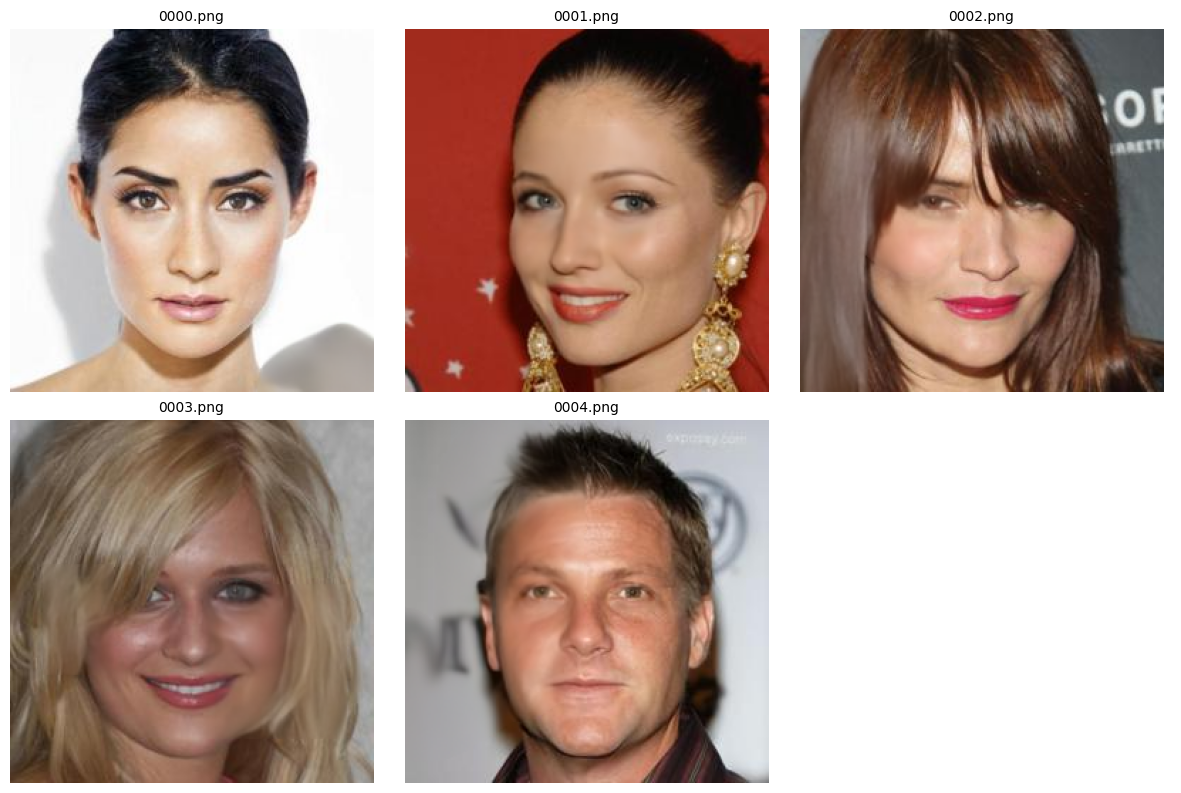

In [18]:
show_images_grid('/kaggle/working/m2s/results/celebahq/thick/outImg')

In [19]:
fid_str = '# === Metric Imports ===\n'\
'from lpips import LPIPS\n'\
'import torch\n'\
'import torch.nn.functional as F\n'\
'from math import log10\n'\
'from torchmetrics.functional.image import structural_similarity_index_measure\n'\
'from PIL import Image\n'\
'from torchvision import transforms\n'\
'import os\n'\
'import sys\n'\
'import io\n'\
'import subprocess\n'\
'# === Set Paths ===\n'\
'gt_dir = \'/kaggle/working/m2s/results/celebahq/thick/gtImg\'\n'\
'out_dir = \'/kaggle/working/m2s/results/celebahq/thick/outImg\'\n'\
'output_path = "/kaggle/working/inpainting_metrics_report.txt"\n'\
'# === Redirect Print to File ===\n'\
'f = open(output_path, "w")\n'\
'sys.stdout = io.TextIOWrapper(open(output_path, \'wb\'))\n'\
'# === Preprocessing ===\n'\
'filenames = sorted([\n'\
'    f for f in os.listdir(out_dir)\n'\
'    if f.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\'))\n'\
'])\n'\
'print(f" Found {len(filenames)} image pairs to evaluate.\\n")\n'\
'# === FID Calculation (CLI) ===\n'\
'print("\\n Running FID Calculation using pytorch-fid...")\n'\
'try:\n'\
'    result = subprocess.run(\n'\
'        ["python", "-m", "pytorch_fid", gt_dir, out_dir],\n'\
'        capture_output=True, text=True\n'\
'    )\n'\
'    if result.returncode == 0:\n'\
'        fid_output = result.stdout.strip()\n'\
'        print(f"FID   : {fid_output.splitlines()[-1]} ↓ (lower is better)")\n'\
'    else:\n'\
'        print(" FID calculation failed:", result.stderr.strip())\n'\
'except Exception as e:\n'\
'    print(f" FID subprocess error: {e}")\n'\
'# === Restore Output ===\n'\
'sys.stdout = sys.__stdout__\n'\
'print(f"\\n Report saved to: {output_path}")\n'
with open('/kaggle/working/m2s/fid.py', 'w') as f:
    f.write(fid_str)
print("Successfully wrote fid.py to /kaggle/working/m2s/fid.py")

Successfully wrote fid.py to /kaggle/working/m2s/fid.py


In [20]:
!source /kaggle/working/miniconda/etc/profile.d/conda.sh && conda activate m2s && \
cd /kaggle/working/m2s && python fid.py


 Report saved to: /kaggle/working/inpainting_metrics_report.txt


In [21]:
import os
import zipfile
from pathlib import Path

# Define the directory containing the images (Kaggle path)
image_dir = '/kaggle/working/m2s/results/celebahq/thick/'

# Output path for the ZIP file (in Kaggle's writable directory)
output_dir = '/kaggle/working'
zip_name = os.path.join(output_dir, f'm2s_250_75_cfs_celebahq_thick_fd.zip')

# Function to collect all image files
def collect_images(directory):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.txt')  # Add more extensions if needed
    image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to zip images
def zip_images(image_files, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in image_files:
            zipf.write(file, os.path.relpath(file, image_dir))
    print(f"Images zipped as {zip_path}")

# Collect all images
image_files = collect_images(image_dir)
print(f"Found {len(image_files)} images in {image_dir}")

# Zip all images
zip_images(image_files, zip_name)

print(f"ZIP file created at {zip_name}. Download it from the Kaggle output panel.")

Found 27 images in /kaggle/working/m2s/results/celebahq/thick/
Images zipped as /kaggle/working/m2s_250_75_cfs_celebahq_thick_fd.zip
ZIP file created at /kaggle/working/m2s_250_75_cfs_celebahq_thick_fd.zip. Download it from the Kaggle output panel.
